------------------------------------------------------------------------

### Part 1: MAP

Write a program in python to implement the MAP (or regularization) for
polynomial curve fitting problem. Follow the instructions below:

1.  Generate 50 2D-data points using the following function:
    ![](./EE5907_%20CA1_files/ass1_04.png)
2.  Add Gaussian random noise to the data
3.  Show the original curve line and the noisy data.
    *The red line is the original curve based on the equation. The green
    dots are the noisy data.*
4.  Fit the generated noisy data using the MAP as discussed in class.
5.  Compute and display the total absolute error value (between the
    predicted and the correct ones) of using the computed w.
6.  Display the estimated values of w
7.  Experiment with your code by changing M and alpha (the coefficient
    of the regularization/prior term) to various values, and then show
    the plots. On each the plot, you must show the values of M and
    alpha.
    *Left: An example of the overfitting problem when M = 10. Right: An
    example of how the regularization term reduces the overfitting
    problem (M =10, alpha = 0.4).*
8.  From the experiment in #7, discuss how M and alpha influence on the
    fitting accuracy.

------------------------------------------------------------------------



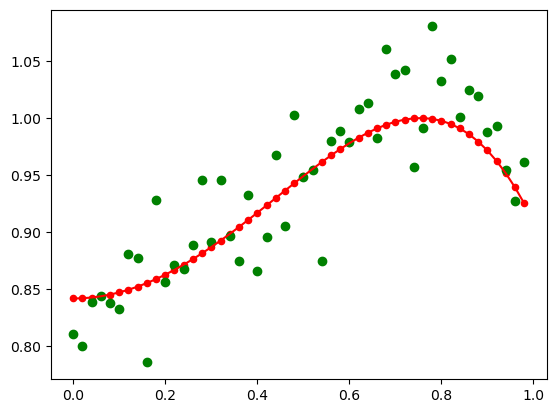

In [47]:
#####1.2.3

import matplotlib.pyplot as plt
import numpy as np
import random

def add_noise(y_curve):
    mu = 0
    sigma = 0.03
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise


def actual_distribution():
    x = np.arange(0,1,0.02)
    y = np.sin(x**2 + 1 )
    return x,y

def plot_image():
    x,y = actual_distribution()
    noisy_y = add_noise(y)

    plt.scatter(x, y, c='r', s=20)
    plt.plot(x, y, 'r')

#     plt.xlim(0.0, 1.0)
#     plt.ylim(0.75, 1.10)
    plt.scatter(x, noisy_y,color='green')

plot_image()

m:10 alpha:0
estimated values of w: [[ 7.92932505e-01  2.86688361e+00 -5.35671071e+01  4.55417066e+02
  -2.03230978e+03  5.24996194e+03 -8.13769452e+03  7.47823563e+03
  -3.76257154e+03  7.99846638e+02]]
total absolute error value: 0.3946298348626035


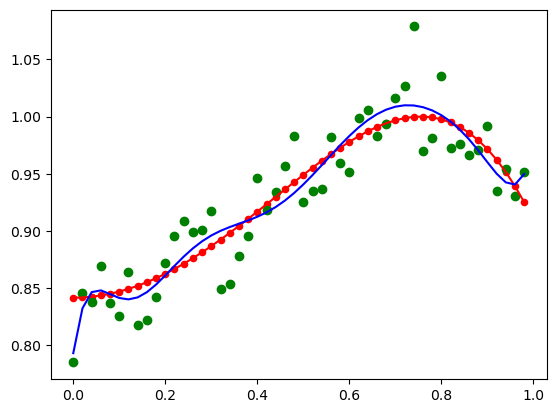

m:10 alpha:0.001
estimated values of w: [[ 0.82345527  0.16580402  0.07251142  0.28825632  0.06323038 -0.22410433
  -0.35907863 -0.28296964 -0.01645901  0.39189596]]
total absolute error value: 0.1507817130989182


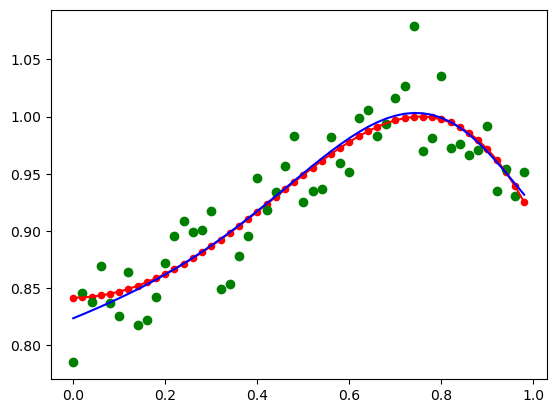

m:10 alpha:0.1
estimated values of w: [[ 0.81366501  0.22594176  0.08939035  0.01807544 -0.02379632 -0.0452977
  -0.0526681  -0.05066849 -0.04281051 -0.03158123]]
total absolute error value: 0.23278759207825417


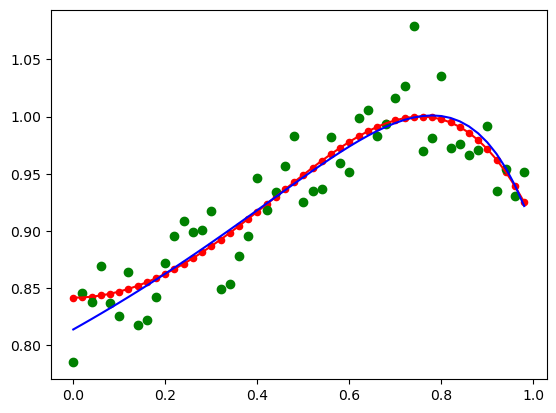

m:5 alpha:0
estimated values of w: [[ 0.82028278  0.22883905 -0.2545569   1.14062595 -1.03279623]]
total absolute error value: 0.14741608548924845


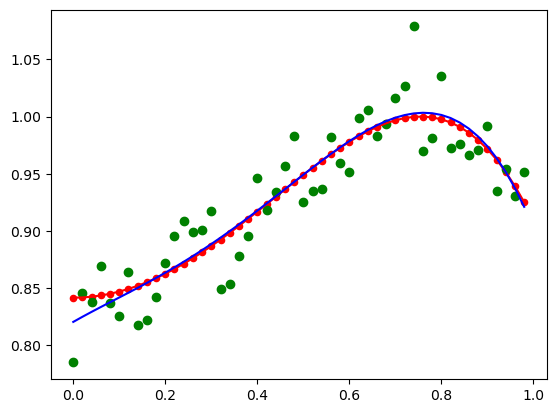

m:5 alpha:0.001
estimated values of w: [[ 0.82509453  0.110531    0.32370663  0.19540535 -0.54324643]]
total absolute error value: 0.15211532124035487


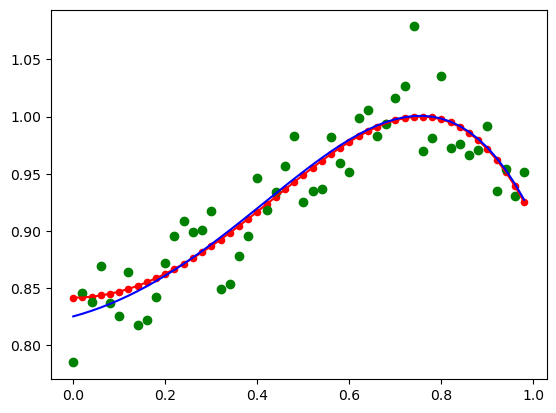

m:5 alpha:0.1
estimated values of w: [[ 0.80795523  0.26964618  0.10153893 -0.05392366 -0.17883698]]
total absolute error value: 0.4626593817370245


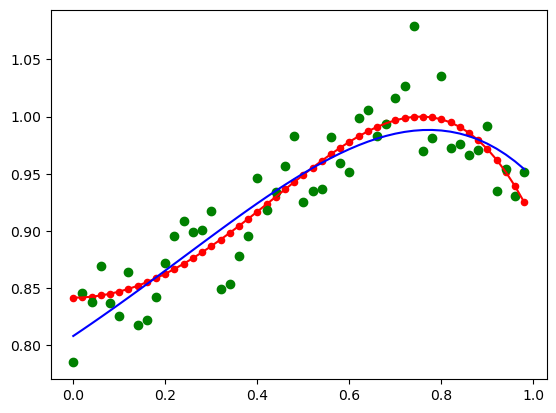

m:3 alpha:0
estimated values of w: [[ 0.79321379  0.4633925  -0.28661286]]
total absolute error value: 0.7877536133409959


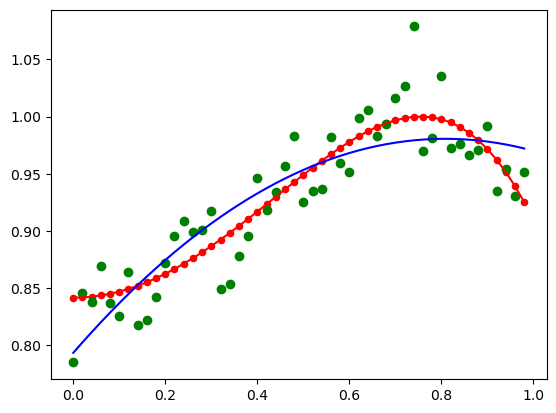

m:3 alpha:0.001
estimated values of w: [[ 0.79355257  0.46121179 -0.28440538]]
total absolute error value: 0.786515117199404


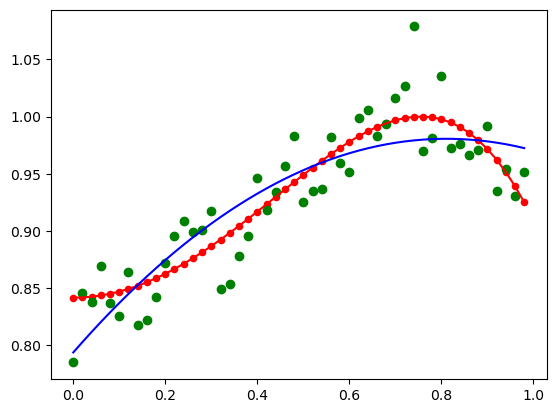

m:3 alpha:0.1
estimated values of w: [[ 0.8112593   0.33749506 -0.15667557]]
total absolute error value: 0.7810897705532946


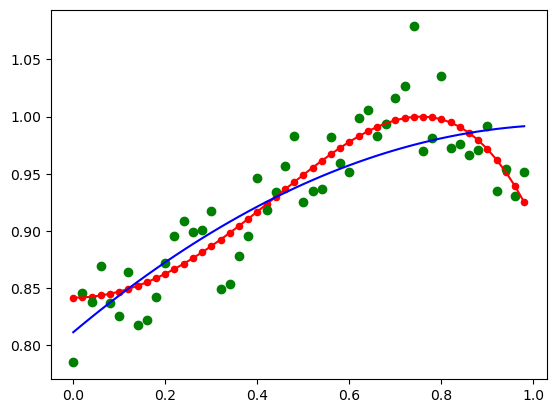

In [48]:
########4.5.6.7

import math
import matplotlib.pyplot as plt
import numpy as np
import random


def likelihood(m, z, w):
    xx = np.random.randn(50, m)
    for i in range(50):
        for j in range(m):
            xx[i, j] = np.power(z[i], j)
    return xx

def xnn(n, m, z):
    xn = np.random.randn(m, 1)
    for i in range(m):
        xn[i, 0] = np.power(z[n], i)
    return xn

def posterior(alpha, z, w, m):
    xx = likelihood(m, z, w)
    omega_posterior = np.dot(np.dot(np.linalg.inv(np.dot(xx.T, xx) + alpha * np.eye(xx.shape[1], xx.shape[1])), xx.T), w.T)
    return omega_posterior

def cacul(z, w, m, alpha):
    omega_posterior = posterior(alpha, z, w, m).reshape(1, m) 
    predict = []
    for i in range(50):
        xn = xnn(i, m, z) 
        a = np.dot(omega_posterior, xn).item()
        predict.append(a)
    print('m:{} alpha:{}'.format(m,alpha))
    print('estimated values of w:',omega_posterior)
    print('total absolute error value:', sum(abs(np.array(predict) - y)))
    plt.scatter(x, y, c='r', s=20)
    plt.plot(x, y, 'r')
#     plt.xlim(0.0, 1.0)
#     plt.ylim(0.75, 1.10)
    plt.scatter(x, noisy_y,color='green')
    plt.plot(z, np.array(predict), 'b')
    plt.show()

def add_noise(y_curve):
    mu = 0
    sigma = 0.03
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise


def actual_distribution():
    x = np.arange(0,1,0.02)
    y = np.sin(x**2 + 1 )
    return x,y


x,y = actual_distribution()
noisy_y = add_noise(y)
    

    
for m in [10, 5, 3]:
    for alpha in [0, 0.001, 0.1]:
        cacul(x, noisy_y, m, alpha)






####8.
M represents the complexity of the model.
When M is large, the model complexity is high and the model is greatly disturbed by noise data, which will lead to overfitting
When M is small, the model complexity is low, which leads to the failure to fit the real situation of the data, and underfitting occurs.

alpha = 1/(sigma**2), represents the uncertainty of the estimated W value.
When alpha is large, sigma square is small, gaussian curves are higher and sharper, so w is more likely to be zero,
he complexity of the model is reduced and the degree of overfitting is reduced.








### Part 2: BASIS FUNCTION

Write a program in python to implement the MLE that employs basis
functions to solve the polynomial curve fitting problem. Follow the
instructions below:

1.  Generate 50 2D-data points using the following function:
2.  Add Gaussian random noise to the data
3.  Fit the generated noisy data using the MLE that employs the
    **Gaussian basis functions** as discussed in class.
4.  Show your results for different values of M that generate
    overfitting and underfitting curves.
5.  Change the basis functions to the **sigmoid basis functions**, and
    show the results for different values of M that generate overfitting
    and underfitting curves.
6.  Change the original curve function, and
    use the sigmoid basis function to estimate the best curve fitting
    from the noisy data.
7.  Experiment with different parameters of the Gaussian and sigmoid
    basis functions, and then show the plot. Also, discuss the
    advantages of these basis functions over polynomial functions.


m:5 s:1
gaussian basis
y = sin(x**2)+1


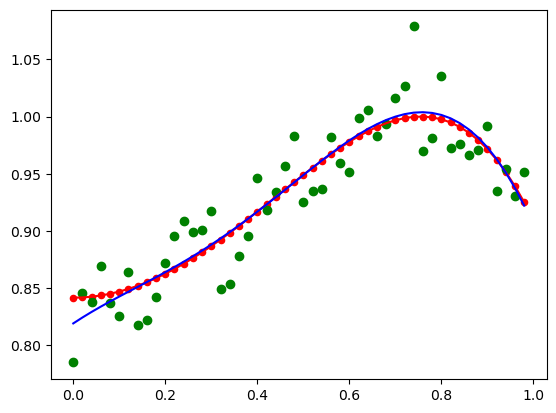

m:5 s:0.1
gaussian basis
y = sin(x**2)+1


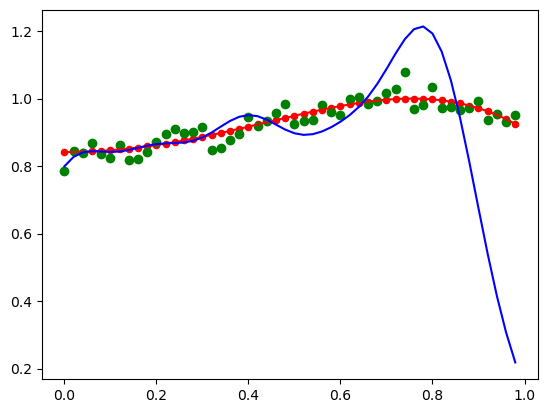

m:5 s:0.01
gaussian basis
y = sin(x**2)+1


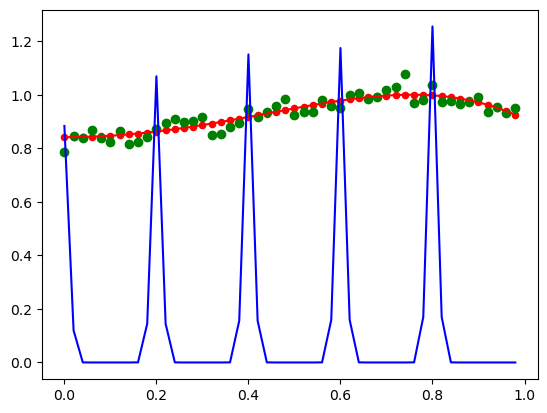

m:50 s:1
gaussian basis
y = sin(x**2)+1


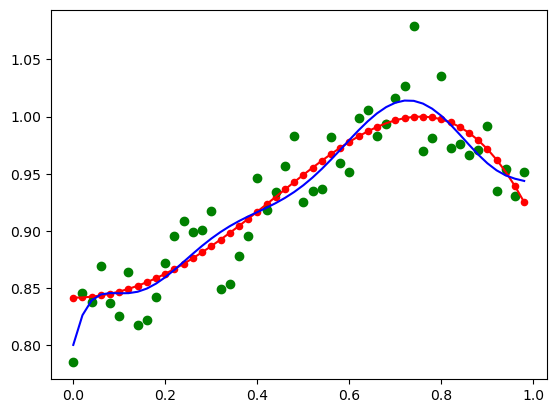

m:50 s:0.1
gaussian basis
y = sin(x**2)+1


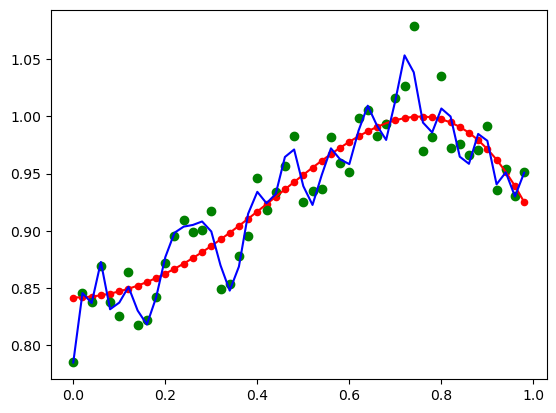

m:50 s:0.01
gaussian basis
y = sin(x**2)+1


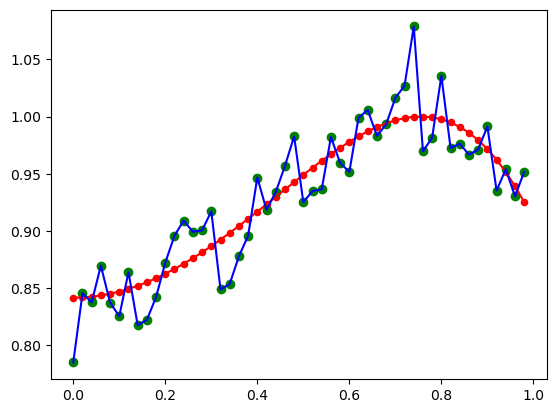

m:100 s:1
gaussian basis
y = sin(x**2)+1


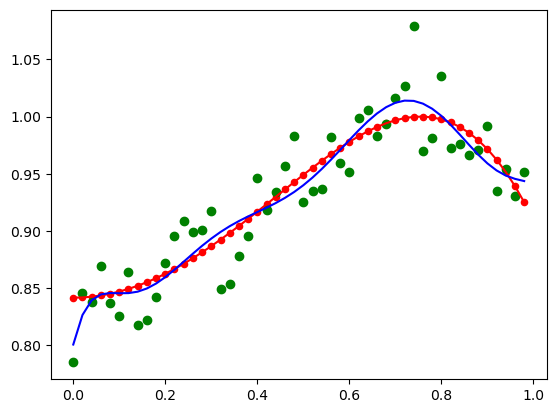

m:100 s:0.1
gaussian basis
y = sin(x**2)+1


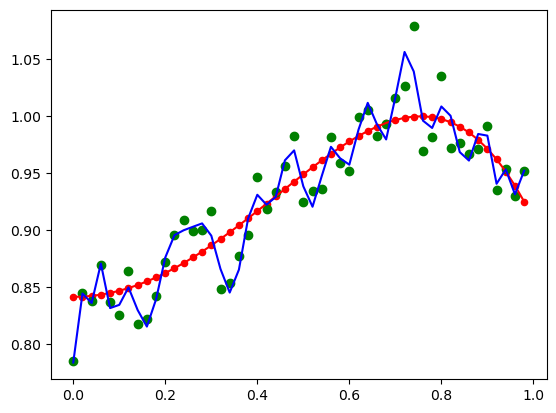

m:100 s:0.01
gaussian basis
y = sin(x**2)+1


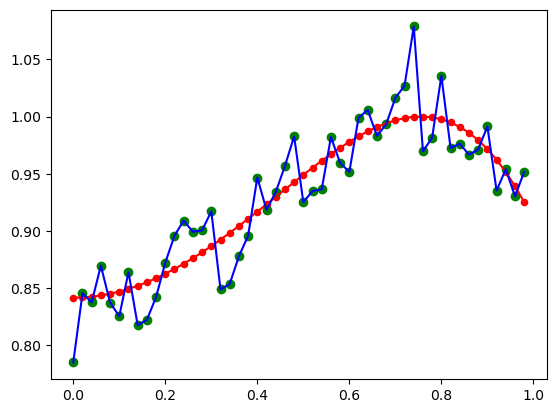

In [49]:
########1.2.3.4

import matplotlib.pyplot as plt
import numpy as np
import random
import math


# gaussian basis function
def gaussion(a, b, c):
    function_g = math.exp(-np.power((a-b), 2)/(2*np.power(c, 2)))
    return function_g

# caculate faifai
def basis_gaussion(m, z, miu, s):
    faifai = np.random.randn(50, m)
    for i in range(50):
        for j in range(m):
            faifai[i, j] = gaussion(z[i], miu[j], s)
    return faifai
# fai_n
def fai_nn(n, m, z, miu, s):
    fai_n = np.random.randn(m, 1)
    for i in range(m):
        fai_n[i, 0] = gaussion(z[n], miu[i], s)
    return fai_n

# for omega parameter
def cal_omega(faifai, w):
    omega = np.dot(np.linalg.pinv(faifai), w)
    return omega



for m in [5, 50, 100]:
    for s in [1, 0.1, 0.01]:
        miu = np.arange(0, 1, 1/m)
        w = noisy_y
        z = x
        faifai = basis_gaussion(m, z, miu, s)
        omega = cal_omega(faifai, w)
        predict = []
        for i in range(50):
            fai_n = fai_nn(i, m, z, miu, s)
            a = np.dot(omega, fai_n).item()
            predict.append(a)
        print('m:{} s:{}'.format(m,s))
        print('gaussian basis')
        print('y = sin(x**2)+1')
        plt.scatter(x, y, c='r', s=20)
        plt.plot(x, y, 'r')
    #     plt.xlim(0.0, 1.0)
    #     plt.ylim(0.75, 1.10)
        plt.scatter(x, noisy_y,color='green')
        plt.plot(z, np.array(predict), 'b')
        plt.show()





m:5 s:1
sigmod basis
y = sin(x**2)+1


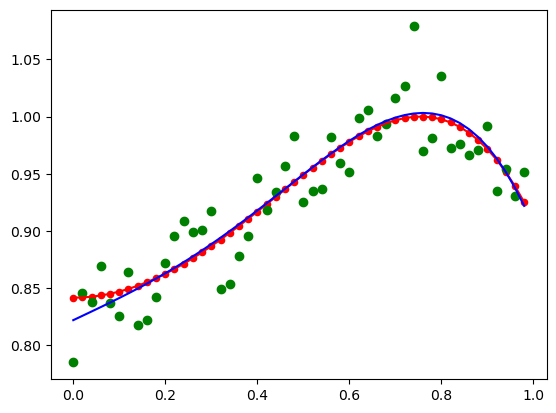

m:5 s:0.1
sigmod basis
y = sin(x**2)+1


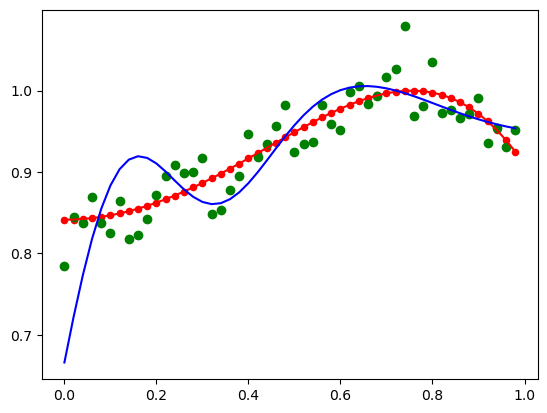

m:5 s:0.01
sigmod basis
y = sin(x**2)+1


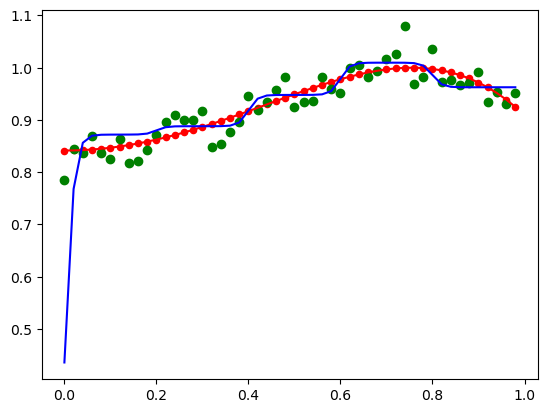

m:50 s:1
sigmod basis
y = sin(x**2)+1


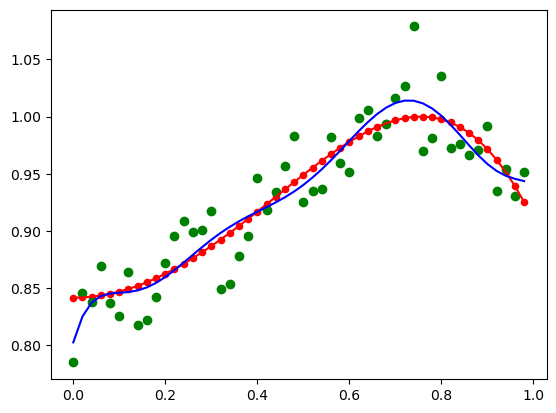

m:50 s:0.1
sigmod basis
y = sin(x**2)+1


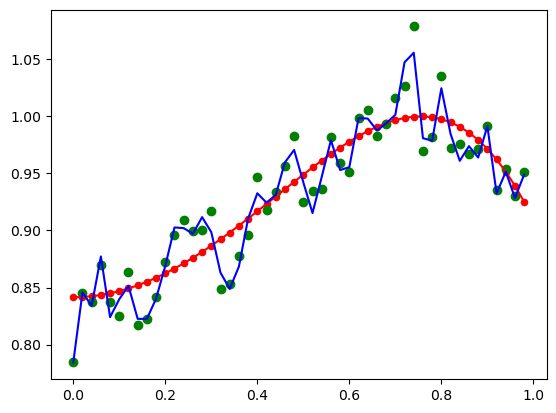

m:50 s:0.01
sigmod basis
y = sin(x**2)+1


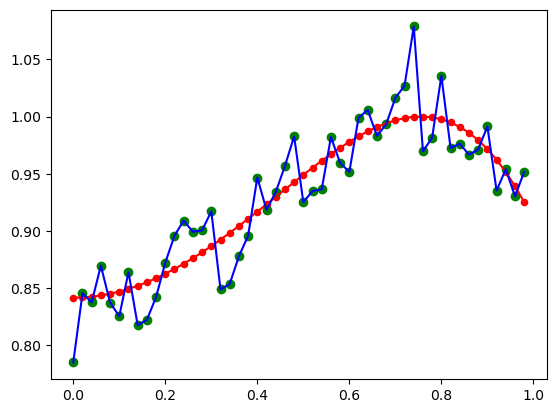

m:100 s:1
sigmod basis
y = sin(x**2)+1


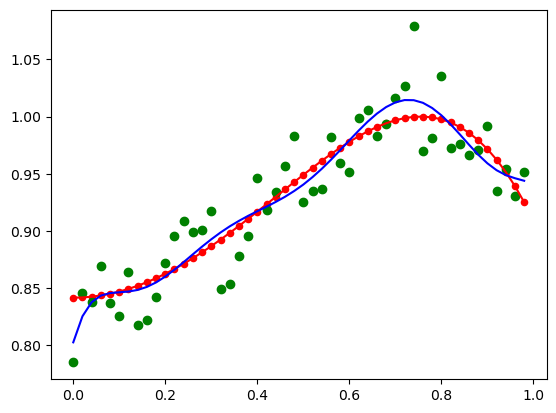

m:100 s:0.1
sigmod basis
y = sin(x**2)+1


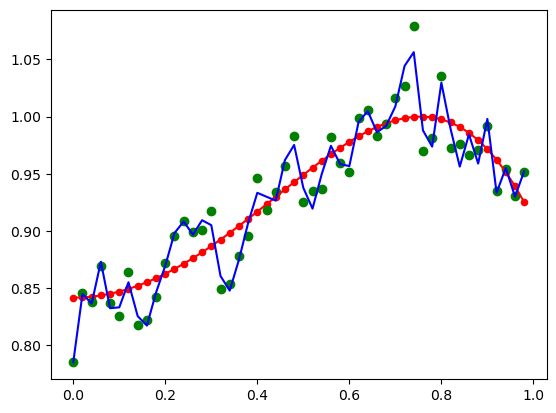

m:100 s:0.01
sigmod basis
y = sin(x**2)+1


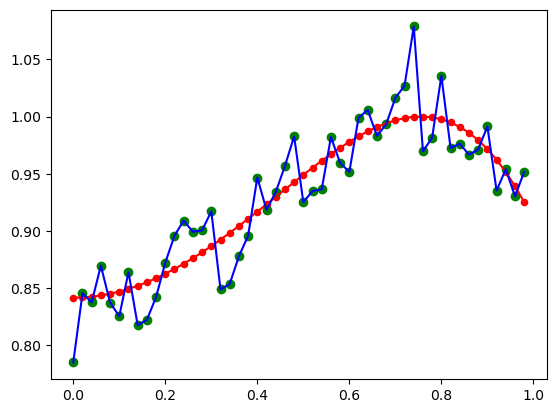

In [50]:
######5.

import matplotlib.pyplot as plt
import numpy as np
import random
import math


# sigmod basis function
def sigmod_func(a, b, c):
    function_s = 1/(1+math.exp(-(a-b)/c))
    return function_s


# caculate faifai
def basis_sigmod(m, z, miu, s):
    faifai = np.random.randn(50, m)
    for i in range(50):
        for j in range(m):
            faifai[i, j] = sigmod_func(z[i], miu[j], s)
    return faifai

# fai_n
def fai_nn(n, m, z, miu, s):
    fai_n = np.random.randn(m, 1)
    for i in range(m):
        fai_n[i, 0] = sigmod_func(z[n], miu[i], s)
    return fai_n

# for omega
def cal_omega(faifai, w):
    omega = np.dot(np.linalg.pinv(faifai), w)
    return omega




for m in [5, 50, 100]:
    for s in [1, 0.1, 0.01]:
        miu = np.arange(0, 1, 1/m)
        w = noisy_y
        z = x
        faifai = basis_sigmod(m, z, miu, s)
        omega = cal_omega(faifai, w)

        predict = []
        for i in range(50):
            fai_n = fai_nn(i, m, z, miu, s)
            a = np.dot(omega, fai_n).item()
            # print(a)
            predict.append(a)
        print('m:{} s:{}'.format(m,s))
        print('sigmod basis')
        print('y = sin(x**2)+1')
        plt.scatter(x, y, c='r', s=20)
        plt.plot(x, y, 'r')
    #     plt.xlim(0.0, 1.0)
    #     plt.ylim(0.75, 1.10)
        plt.scatter(x, noisy_y,color='green')
        plt.plot(z, np.array(predict), 'b')
        plt.show()


m:5 s:1
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


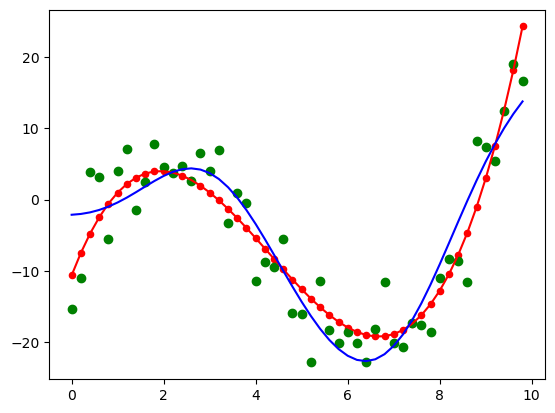

m:5 s:5
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


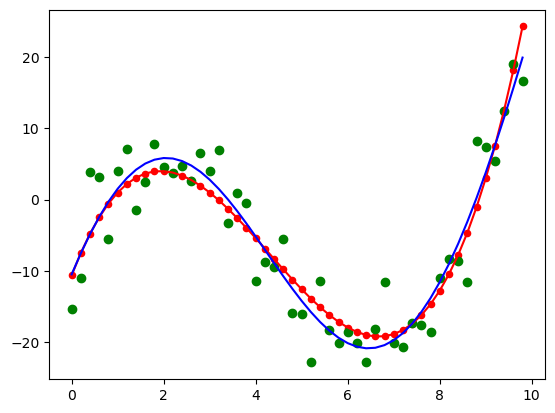

m:5 s:10
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


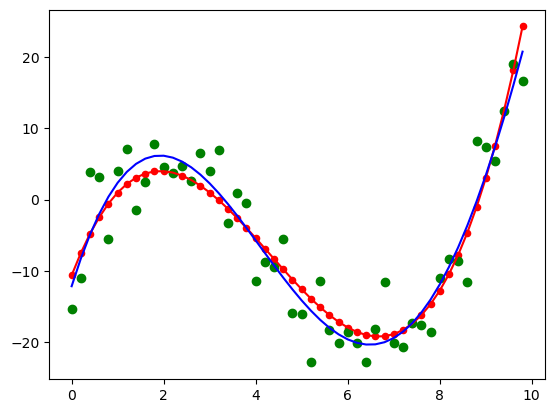

m:50 s:1
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


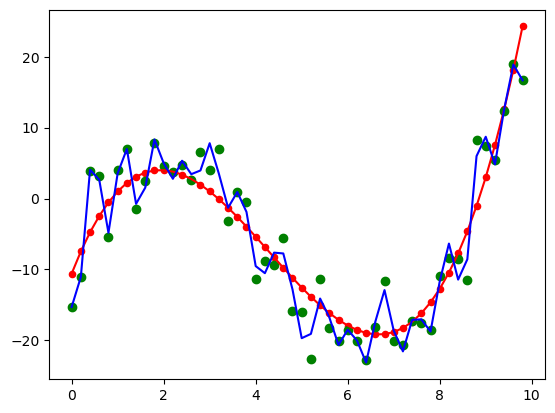

m:50 s:5
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


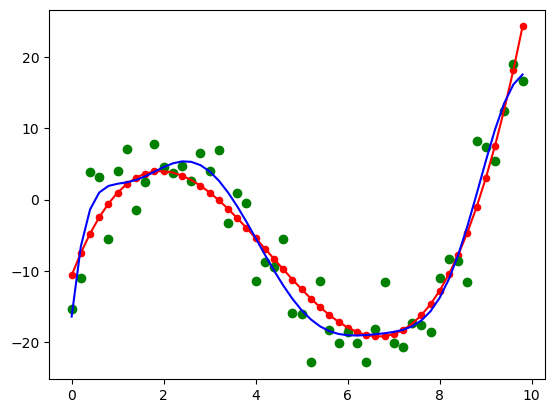

m:50 s:10
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


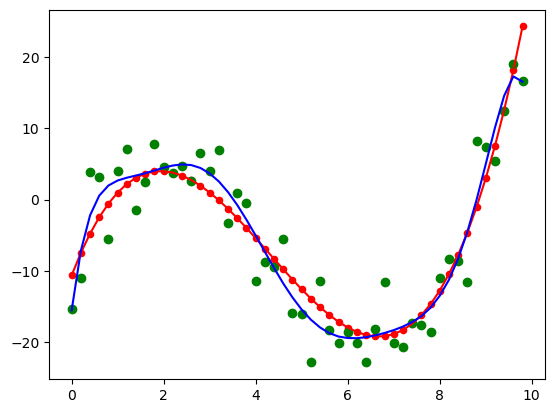

m:100 s:1
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


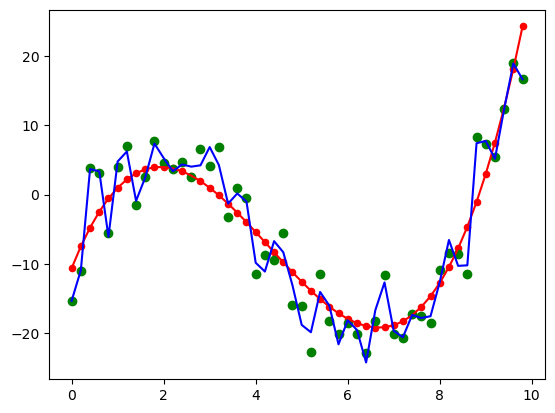

m:100 s:5
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


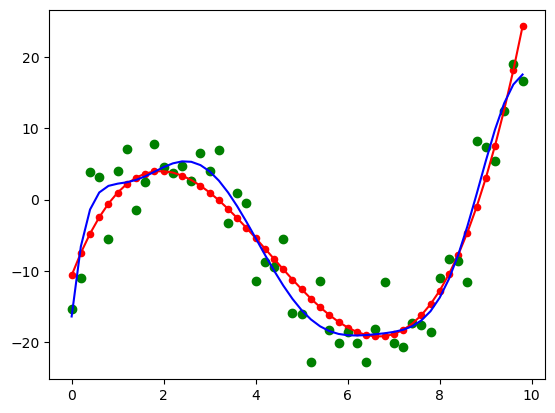

m:100 s:10
sigmod basis
y = 0.4345x**3-5.607x**2+16.78x-10.61


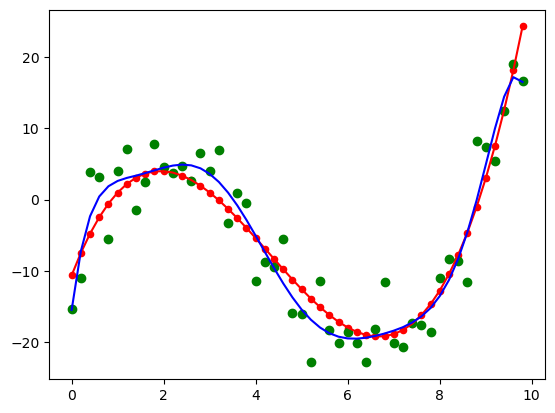

In [51]:
########6.7.

import matplotlib.pyplot as plt
import numpy as np
import random
import math


def actual_distribution_new():
    x = np.arange(0,10,1/5)
    y = 0.4345 * np.power(x, 3) - 5.607 * np.power(x, 2) + 16.78 * x - 10.61
    return x,y


def add_noise(y_curve):
    mu = 0
    sigma = 4
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise


# sigmod basis function
def sigmod_func(a, b, c):
    function_s = 1/(1 + math.exp(-(a-b)/c))
    return function_s


# caculate faifai
def basis_sigmod(m, z, miu, s):
    faifai = np.random.randn(50, m)
    for i in range(50):
        for j in range(m):
            faifai[i, j] = sigmod_func(z[i], miu[j], s)
    return faifai

# fai_n
def fai_nn(n, m, z, miu, s):
    fai_n = np.random.randn(m, 1)
    for i in range(m):
        fai_n[i, 0] = sigmod_func(z[n], miu[i], s)
    return fai_n

# for omega
def cal_omega(faifai, w):
    omega = np.dot(np.linalg.pinv(faifai), w)
    return omega

x_n,y_n = actual_distribution_new()
noisy_y_n = add_noise(y_n)



for m in [5, 50, 100]:
    for s in [1, 5, 10]:
        miu = np.arange(0, 10, 10/m)
        w = noisy_y_n
        z = x_n
        faifai = basis_sigmod(m, z, miu, s)
        omega = cal_omega(faifai, w)

        predict = []
        for i in range(50):
            fai_n = fai_nn(i, m, z, miu, s)
            a = np.dot(omega, fai_n).item()
            # print(a)
            predict.append(a)
        print('m:{} s:{}'.format(m,s))
        print('sigmod basis')
        print('y = 0.4345x**3-5.607x**2+16.78x-10.61')
        plt.scatter(x_n, y_n, c='r', s=20)
        plt.plot(x_n, y_n, 'r')

        plt.scatter(x_n, noisy_y_n,color='green')
        plt.plot(z, np.array(predict), 'b')
        plt.show()


#####8
Polynomial basis functions are global functions of input variables X, and changes in one region of the input space will affect other regions.
Gaussian basis function and Sigmod basis function can divide the space into several regions, each region is fitted with a different function, and each region does not affect with each other.

* * *

### Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

> Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below:

1.  Generate 50 2D-data points using the following function: . Add Gaussian random noise to the data. Show the original curve line and the noisy data.  
    _The red line is the original curve based on the equation. The green dots are the noisy data._
2.  Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.
3.  Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.
4.  Show your best fitting, similar to:  

5.  Explain how useful p(w|t) for the training and testing stages.
6.  Generate 50 2D-data points using the following function: . Add Gaussian random noise to the data. Show the original curve line and the noisy data.  
    _The red line is the original curve based on the equation. The green dots are the noisy data._
7.  Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one: 
8.  Explain why the predictive distribution is better than the original form of the full Bayesian inference.
9.  Discuss the differences between p(t_new|t) and p(w|t).

***


estimated values of w: [[ 2.35963914  2.00673547  1.67606677  1.36673357  1.07831214  0.81109372
   0.56384581  0.3378046   0.1309538  -0.0555941  -0.22637071 -0.37570303
  -0.50872739 -0.62474634 -0.72402291 -0.80773356 -0.87609543 -0.93041433
  -0.97067308 -0.99807569 -1.01327514 -1.01712823 -1.01004495 -0.99315447
  -0.96696596 -0.93247073 -0.89026499 -0.84124037 -0.78600139 -0.72545404
  -0.66023186 -0.59104025 -0.51870047 -0.4437501  -0.36695285 -0.28891481
  -0.21013327 -0.13188784 -0.05352305  0.02340002  0.09874455  0.17208278
   0.24277285  0.31053814  0.37495323  0.43568613  0.49240306  0.54481742
   0.59268728  0.63583947  0.6740022   0.70711658  0.73505895  0.75771752
   0.77509002  0.78715331  0.7939306   0.79546012  0.79183127  0.78319173
   0.76963899  0.7513187   0.72845724  0.70124964  0.66993038  0.63474585
   0.59596823  0.55388033  0.50877727  0.46097513  0.41078894  0.35855706
   0.30461329  0.24929034  0.19294137  0.13590961  0.07853611  0.02117038
  -0.03586083 -

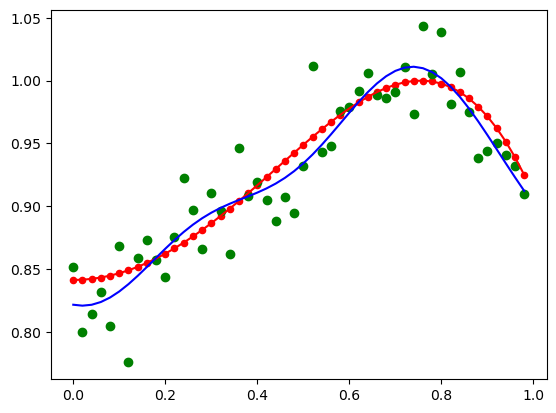

estimated values of w: [[11.79805662 11.13216496  5.5542037   6.11817229  3.80523825  1.90754463
   0.65669336 -0.87752189 -1.61020436 -2.80593439 -3.44899177 -4.11170291
  -4.55368263 -4.90095036 -5.07158695 -5.22845162 -5.39252957 -5.24191657
  -5.14564336 -4.93057831 -4.66822463 -4.39078238 -3.9991281  -3.61854389
  -3.18107022 -2.7292291  -2.25524875 -1.80356586 -1.30254344 -0.81885815
  -0.35125334  0.11977604  0.56851147  0.99864913  1.40643244  1.79271748
   2.14013041  2.47328926  2.76489514  3.02090038  3.24129638  3.43084036
   3.57932122  3.69219565  3.76898578  3.80852922  3.81421688  3.78513177
   3.72292097  3.60711773  3.50397343  3.35692422  3.17206829  2.97212501
   2.74677006  2.51674403  2.24311655  1.97078289  1.68216488  1.39225698
   1.09163541  0.78674422  0.4813452   0.17337387 -0.11631284 -0.4144663
  -0.70426218 -0.97936285 -1.24266441 -1.49110158 -1.72454622 -1.94163928
  -2.13832882 -2.31668981 -2.47223636 -2.60895913 -2.71866977 -2.80958082
  -2.87517718 -2

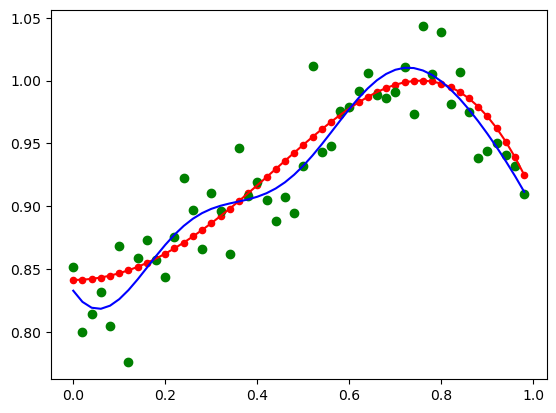

estimated values of w: [[ 33.09829192  25.23718825   5.1633713   16.28827723   4.83071101
   16.25994777   1.07972929 -14.57522794 -20.48489588  -4.66413405
   -6.79305054 -24.39052064   3.16677495 -18.84834149 -15.24885047
  -13.55702932 -12.85678061 -11.96690082 -12.40711286 -13.68133433
   -7.30683112  -8.16563376  -6.66039566  -5.87031175  -2.83465224
   -4.79053556   0.12415803   0.19052545   1.55167724   3.7859818
    2.44251024   6.40470075   6.07529557   7.0859437    8.00908413
    8.68996645   9.4208269    9.36089936  10.25748255  10.15053351
   10.34364442  10.37451259  10.12774313   9.76159912   9.61731219
    9.05171483   8.46988294   7.90667872   7.31809011   6.25207481
    5.73722503   4.85103169   3.88925187   3.06467697   2.02760893
    1.11192753   0.29349444  -0.70477115  -1.76470136  -2.35375736
   -3.29865056  -4.11508821  -4.7663385   -5.50414857  -6.07514757
   -6.66608855  -7.10870714  -7.49498264  -7.87237521  -8.05833669
   -8.2549511   -8.3321026   -8.33373221

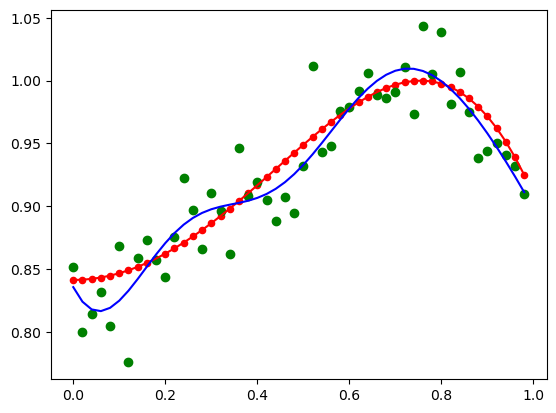

estimated values of w: [[ 5.44696676e-02  5.22350049e-02  5.00114508e-02  4.78015949e-02
   4.56080015e-02  4.34332030e-02  4.12796966e-02  3.91499388e-02
   3.70463411e-02  3.49712654e-02  3.29270195e-02  3.09158527e-02
   2.89399517e-02  2.70014362e-02  2.51023553e-02  2.32446829e-02
   2.14303146e-02  1.96610639e-02  1.79386588e-02  1.62647381e-02
   1.46408491e-02  1.30684441e-02  1.15488780e-02  1.00834057e-02
   8.67317976e-03  7.31924838e-03  6.02255366e-03  4.78392975e-03
   3.60410172e-03  2.48368415e-03  1.42318039e-03  4.22981773e-04
  -5.16632793e-04 -1.39549696e-03 -2.21355697e-03 -2.97087136e-03
  -3.66761030e-03 -4.30405494e-03 -4.88059631e-03 -5.39773403e-03
  -5.85607481e-03 -6.25633081e-03 -6.59931727e-03 -6.88595090e-03
  -7.11724700e-03 -7.29431680e-03 -7.41836492e-03 -7.49068587e-03
  -7.51266129e-03 -7.48575595e-03 -7.41151456e-03 -7.29155765e-03
  -7.12757776e-03 -6.92133527e-03 -6.67465413e-03 -6.38941736e-03
  -6.06756252e-03 -5.71107740e-03 -5.32199457e-03 -4.

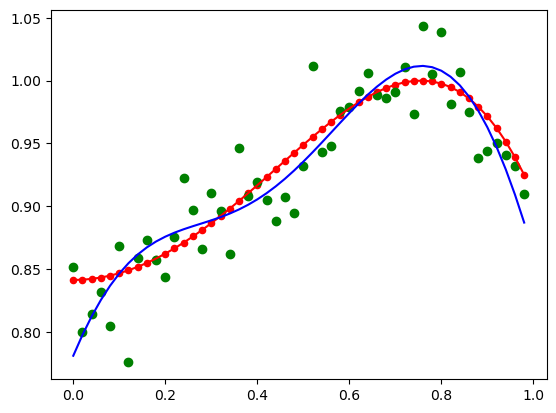

estimated values of w: [[ 2.17845296e-01  1.96310941e-01  1.75672647e-01  1.55936674e-01
   1.37109674e-01  1.19194270e-01  1.02192539e-01  8.61028098e-02
   7.09232106e-02  5.66485907e-02  4.32727513e-02  3.07871358e-02
   1.91817841e-02  8.44371376e-03 -1.43947145e-03 -1.04840547e-02
  -1.87069517e-02 -2.61266311e-02 -3.27631914e-02 -3.86380102e-02
  -4.37738526e-02 -4.81946529e-02 -5.19255093e-02 -5.49925424e-02
  -5.74229135e-02 -5.92444599e-02 -6.04860317e-02 -6.11769399e-02
  -6.13471874e-02 -6.10272699e-02 -6.02478807e-02 -5.90402370e-02
  -5.74354860e-02 -5.54650878e-02 -5.31603112e-02 -5.05523763e-02
  -4.76722797e-02 -4.45507247e-02 -4.12180035e-02 -3.77039428e-02
  -3.40377780e-02 -3.02481292e-02 -2.63628546e-02 -2.24090053e-02
  -1.84128352e-02 -1.43994869e-02 -1.03932967e-02 -6.41735765e-03
  -2.49380528e-03  1.35651219e-03  5.11395311e-03  8.76002456e-03
   1.22776484e-02  1.56509548e-02  1.88654925e-02  2.19080845e-02
   2.47670211e-02  2.74318647e-02  2.98936422e-02  3.

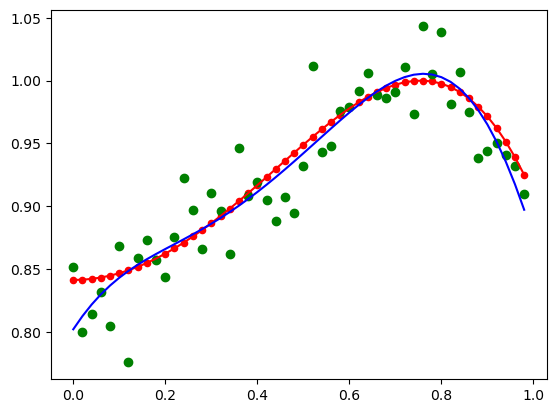

estimated values of w: [[ 8.11756127e-01  7.02884222e-01  5.99948000e-01  5.02936602e-01
   4.11832177e-01  3.26581349e-01  2.47130897e-01  1.73414214e-01
   1.05354121e-01  4.28451620e-02 -1.41784110e-02 -6.58759961e-02
  -1.12351308e-01 -1.53742747e-01 -1.90196739e-01 -2.21865238e-01
  -2.48913921e-01 -2.71500154e-01 -2.89852570e-01 -3.04071483e-01
  -3.14418670e-01 -3.21060108e-01 -3.24198418e-01 -3.24047161e-01
  -3.20807796e-01 -3.14695417e-01 -3.05915152e-01 -2.94686908e-01
  -2.81226236e-01 -2.65741912e-01 -2.48450356e-01 -2.29563060e-01
  -2.09288046e-01 -1.87830706e-01 -1.65396280e-01 -1.42180940e-01
  -1.18380361e-01 -9.41805641e-02 -6.97647510e-02 -4.53102597e-02
  -2.09850858e-02  3.05107502e-03  2.66408791e-02  4.96413096e-02
   7.19144418e-02  9.33324975e-02  1.13776426e-01  1.33137036e-01
   1.51313480e-01  1.68218920e-01  1.83768568e-01  1.97896656e-01
   2.10539968e-01  2.21651151e-01  2.31188991e-01  2.39125343e-01
   2.45438404e-01  2.50119190e-01  2.53167227e-01  2.

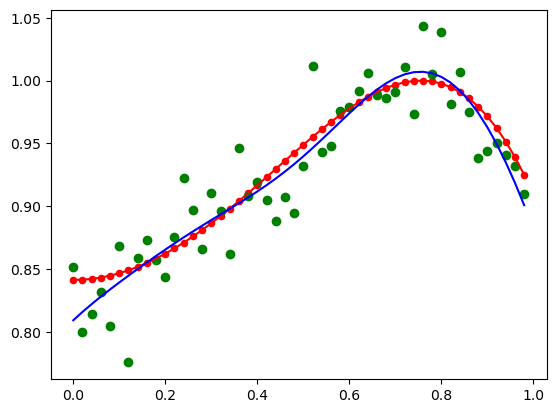

estimated values of w: [[0.01806189 0.01795581 0.01784272 0.0177227  0.01759582 0.01746216
  0.01732181 0.01717488 0.01702145 0.01686165 0.0166956  0.01652341
  0.01634522 0.01616118 0.01597142 0.0157761  0.01557538 0.01536943
  0.01515841 0.01494251 0.01472191 0.01449679 0.01426735 0.01403379
  0.01379631 0.01355513 0.01331045 0.01306249 0.01281149 0.01255765
  0.01230121 0.0120424  0.01178146 0.01151863 0.01125414 0.01098824
  0.01072117 0.01045318 0.01018452 0.00991543 0.00964617 0.00937698
  0.00910812 0.00883982 0.00857236 0.00830596 0.00804089 0.00777738
  0.00751569 0.00725605 0.00699872 0.00674392 0.0064919  0.00624288
  0.00599711 0.0057548  0.00551618 0.00528148 0.0050509  0.00482467
  0.00460298 0.00438604 0.00417404 0.00396719 0.00376566 0.00356965
  0.00337931 0.00319484 0.00301637 0.00284409 0.00267813 0.00251865
  0.00236577 0.00221963 0.00208036 0.00194808 0.00182288 0.00170488
  0.00159418 0.00149085 0.00139498 0.00130665 0.00122591 0.00115284
  0.00108747 0.00102985 0

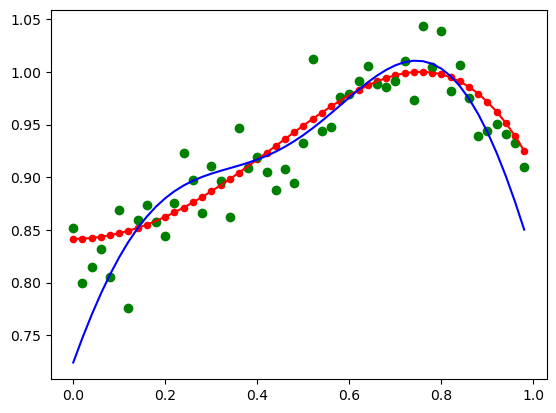

estimated values of w: [[ 5.44696676e-02  5.22350050e-02  5.00114507e-02  4.78015950e-02
   4.56080015e-02  4.34332030e-02  4.12796966e-02  3.91499388e-02
   3.70463411e-02  3.49712654e-02  3.29270195e-02  3.09158527e-02
   2.89399517e-02  2.70014363e-02  2.51023553e-02  2.32446829e-02
   2.14303146e-02  1.96610640e-02  1.79386587e-02  1.62647381e-02
   1.46408491e-02  1.30684441e-02  1.15488780e-02  1.00834057e-02
   8.67317976e-03  7.31924840e-03  6.02255363e-03  4.78392976e-03
   3.60410171e-03  2.48368415e-03  1.42318039e-03  4.22981761e-04
  -5.16632786e-04 -1.39549695e-03 -2.21355698e-03 -2.97087136e-03
  -3.66761030e-03 -4.30405494e-03 -4.88059631e-03 -5.39773403e-03
  -5.85607482e-03 -6.25633074e-03 -6.59931728e-03 -6.88595095e-03
  -7.11724696e-03 -7.29431685e-03 -7.41836487e-03 -7.49068591e-03
  -7.51266127e-03 -7.48575597e-03 -7.41151454e-03 -7.29155764e-03
  -7.12757776e-03 -6.92133528e-03 -6.67465412e-03 -6.38941733e-03
  -6.06756256e-03 -5.71107738e-03 -5.32199458e-03 -4.

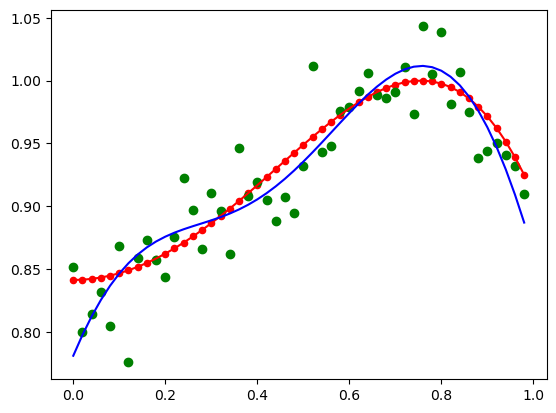

estimated values of w: [[ 9.58818513e-02  8.99456207e-02  8.41340936e-02  7.84525871e-02
   7.29061759e-02  6.74996146e-02  6.22373713e-02  5.71236137e-02
   5.21621808e-02  4.73566232e-02  4.27101480e-02  3.82256493e-02
   3.39056714e-02  2.97524579e-02  2.57678977e-02  2.19535563e-02
   1.83106565e-02  1.48400974e-02  1.15424410e-02  8.41792365e-03
   5.46645462e-03  2.68761974e-03  8.06912827e-05 -2.35537230e-03
  -4.62191690e-03 -6.72058860e-03 -8.65332267e-03 -1.04223366e-02
  -1.20301283e-02 -1.34794437e-02 -1.47733032e-02 -1.59149611e-02
  -1.69079117e-02 -1.77558543e-02 -1.84627160e-02 -1.90326135e-02
  -1.94698475e-02 -1.97788952e-02 -1.99643860e-02 -2.00311009e-02
  -1.99839493e-02 -1.98279584e-02 -1.95682594e-02 -1.92100745e-02
  -1.87587022e-02 -1.82195016e-02 -1.75978809e-02 -1.68992822e-02
  -1.61291702e-02 -1.52930122e-02 -1.43962761e-02 -1.34444051e-02
  -1.24428125e-02 -1.13968673e-02 -1.03118824e-02 -9.19310189e-03
  -8.04568931e-03 -6.87471908e-03 -5.68516475e-03 -4.

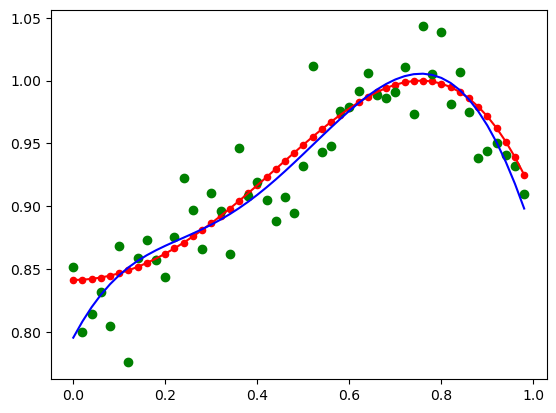

estimated values of w: [[0.01038024 0.01038606 0.01038855 0.01038769 0.0103835  0.01037595
  0.01036507 0.01035085 0.01033331 0.01031245 0.01028831 0.01026089
  0.01023022 0.01019634 0.01015927 0.01011905 0.01007572 0.01002932
  0.00997991 0.00992753 0.00987223 0.00981408 0.00975314 0.00968947
  0.00962314 0.00955423 0.0094828  0.00940894 0.00933273 0.00925426
  0.0091736  0.00909086 0.00900613 0.0089195  0.00883107 0.00874095
  0.00864924 0.00855605 0.00846147 0.00836564 0.00826865 0.00817062
  0.00807168 0.00797193 0.00787149 0.0077705  0.00766906 0.0075673
  0.00746535 0.00736333 0.00726136 0.00715957 0.00705808 0.00695702
  0.00685651 0.00675669 0.00665767 0.00655957 0.00646253 0.00636666
  0.00627209 0.00617893 0.0060873  0.00599732 0.00590911 0.00582278
  0.00573844 0.0056562  0.00557617 0.00549845 0.00542315 0.00535036
  0.00528018 0.00521271 0.00514803 0.00508624 0.00502741 0.00497163
  0.00491898 0.00486953 0.00482334 0.00478049 0.00474104 0.00470504
  0.00467255 0.00464362 0.

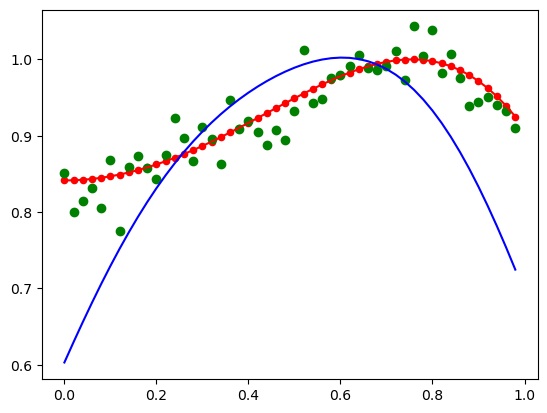

estimated values of w: [[0.02720061 0.02667231 0.02613771 0.02559736 0.02505185 0.02450176
  0.02394766 0.02339015 0.02282982 0.02226725 0.02170305 0.0211378
  0.02057208 0.0200065  0.01944163 0.01887804 0.01831632 0.01775703
  0.01720073 0.01664796 0.01609927 0.0155552  0.01501625 0.01448295
  0.01395577 0.01343521 0.01292174 0.01241579 0.01191781 0.01142823
  0.01094743 0.0104758  0.01001372 0.00956152 0.00911954 0.00868809
  0.00826744 0.00785788 0.00745964 0.00707296 0.00669803 0.00633504
  0.00598415 0.00564551 0.00531923 0.00500541 0.00470412 0.00441542
  0.00413935 0.00387591 0.0036251  0.00338689 0.00316124 0.00294807
  0.0027473  0.00255882 0.00238252 0.00221825 0.00206586 0.00192517
  0.00179599 0.00167812 0.00157134 0.00147543 0.00139014 0.00131521
  0.00125038 0.00119538 0.00114991 0.00111369 0.00108641 0.00106777
  0.00105745 0.00105514 0.00106052 0.00107326 0.00109304 0.00111952
  0.00115239 0.00119131 0.00123596 0.00128602 0.00134117 0.00140109
  0.00146547 0.00153401 0.

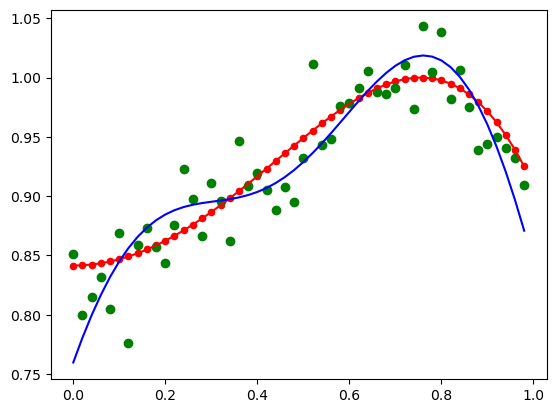

estimated values of w: [[ 5.44696676e-02  5.22350050e-02  5.00114507e-02  4.78015950e-02
   4.56080014e-02  4.34332030e-02  4.12796966e-02  3.91499389e-02
   3.70463411e-02  3.49712654e-02  3.29270195e-02  3.09158527e-02
   2.89399517e-02  2.70014363e-02  2.51023553e-02  2.32446829e-02
   2.14303146e-02  1.96610640e-02  1.79386587e-02  1.62647381e-02
   1.46408491e-02  1.30684441e-02  1.15488780e-02  1.00834057e-02
   8.67317977e-03  7.31924837e-03  6.02255365e-03  4.78392974e-03
   3.60410172e-03  2.48368414e-03  1.42318039e-03  4.22981760e-04
  -5.16632778e-04 -1.39549695e-03 -2.21355698e-03 -2.97087137e-03
  -3.66761029e-03 -4.30405495e-03 -4.88059631e-03 -5.39773402e-03
  -5.85607482e-03 -6.25633076e-03 -6.59931728e-03 -6.88595092e-03
  -7.11724701e-03 -7.29431678e-03 -7.41836491e-03 -7.49068589e-03
  -7.51266127e-03 -7.48575597e-03 -7.41151455e-03 -7.29155764e-03
  -7.12757778e-03 -6.92133527e-03 -6.67465415e-03 -6.38941730e-03
  -6.06756255e-03 -5.71107737e-03 -5.32199460e-03 -4.

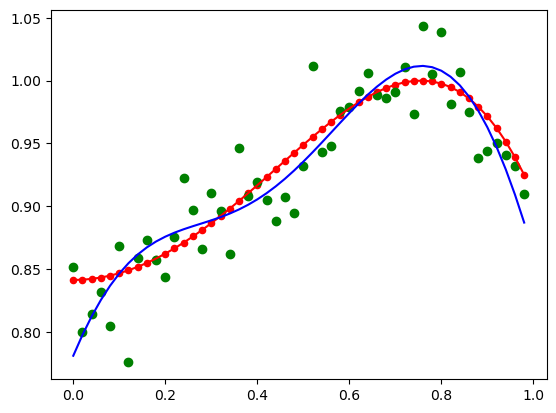

In [52]:
###########1.2.3.

import matplotlib.pyplot as plt
import numpy as np
import random
import math


def add_noise(y_curve):
    mu = 0
    sigma = 0.03
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise


def actual_distribution():
    x = np.arange(0, 1, 0.02)
    y = np.sin(x ** 2 + 1)
    return x, y



x, y = actual_distribution()
noisy_y = add_noise(y)


# gaussian basis function
def gaussion(a, b, c):
    function_g = math.exp(-np.power((a - b), 2) / (2 * np.power(c, 2)))
    return function_g


# caculate faifai 50*m
def basis_gaussion(m, z, miu, s):
    faifai = np.random.randn(50, m)
    for i in range(50):
        for j in range(m):
            faifai[i, j] = gaussion(z[i], miu[j], s)
    return faifai


# fai_n
def fai_nn(n, m, z, miu, s):
    fai_n = np.random.randn(m, 1)
    for i in range(m):
        fai_n[i, 0] = gaussion(z[n], miu[i], s)
    return fai_n


# for MAP posterior
# alpla/beta manual setting
def posterior_basgau(alpha, beta, faifai, w):
    omega_posterior = np.dot(
        np.dot(beta * np.linalg.inv(beta * np.dot(faifai.T, faifai) + alpha * np.eye(faifai.shape[1], faifai.shape[1])),
               faifai.T), w.T)
    return omega_posterior


def xnn(n, m, z):
    xn = np.random.randn(m, 1)
    for i in range(m):
        xn[i, 0] = np.power(z[n], i)
    return xn


m = 200
miu = np.arange(0, 1, 1/m)
s = 0.3

for alpha in [0.0000001,0.001, 0.1, 1]:
    for beta in [0.01,1,10]:  
        z = x
        w = noisy_y
        faifai = basis_gaussion(m, z, miu, s)
        omega_posterior = posterior_basgau(alpha, beta, faifai, w).reshape(1, m)
        predict = []
        for i in range(50):
            fai_n = fai_nn(i, m, z, miu, s)
            a = np.dot(omega_posterior, fai_n).item()
            predict.append(a)
        print('estimated values of w:',omega_posterior)
        print('alpha:{} beta:{}'.format(alpha, beta))
        plt.scatter(x, y, c='r', s=20)
        plt.plot(x, y, 'r')
        plt.scatter(x, noisy_y, color='green')
        plt.plot(z, np.array(predict), 'b')
        plt.show()


######3.
alpha represents the uncertainty of the estimated W value. When alpha is large, sigma square is small, gaussian curves are higher and sharper, so w is more likely to be zero, he complexity of the model is reduced and the degree of overfitting is reduced.
beta represents the uncertainty of T value predicted by specific W, and it actually depends on M. 


alpha:0.001 beta:10
best fitting


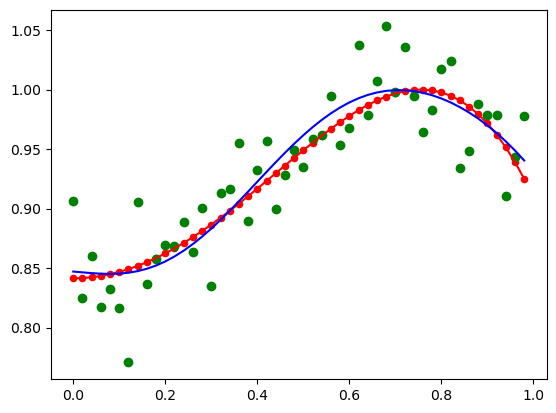

In [36]:
###########4.

import matplotlib.pyplot as plt
import numpy as np
import random
import math


def add_noise(y_curve):
    mu = 0
    sigma = 0.03
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise


def actual_distribution():
    x = np.arange(0, 1, 0.02)
    y = np.sin(x ** 2 + 1)
    return x, y



x, y = actual_distribution()
noisy_y = add_noise(y)


# gaussian basis function
def gaussion(a, b, c):
    function_g = math.exp(-np.power((a - b), 2) / (2 * np.power(c, 2)))
    return function_g


# caculate faifai 50*m
def basis_gaussion(m, z, miu, s):
    faifai = np.random.randn(50, m)
    for i in range(50):
        for j in range(m):
            faifai[i, j] = gaussion(z[i], miu[j], s)
    return faifai


# fai_n
def fai_nn(n, m, z, miu, s):
    fai_n = np.random.randn(m, 1)
    for i in range(m):
        fai_n[i, 0] = gaussion(z[n], miu[i], s)
    return fai_n


# for MAP posterior
# alpla/beta manual setting
def posterior_basgau(alpha, beta, faifai, w):
    omega_posterior = np.dot(
        np.dot(beta * np.linalg.inv(beta * np.dot(faifai.T, faifai) + alpha * np.eye(faifai.shape[1], faifai.shape[1])),
               faifai.T), w.T)
    return omega_posterior


def xnn(n, m, z):
    xn = np.random.randn(m, 1)
    for i in range(m):
        xn[i, 0] = np.power(z[n], i)
    return xn


m = 150
miu = np.arange(0, 1, 1/m)
s = 0.4
alpha = 0.001 
beta = 10

z = x
w = noisy_y
faifai = basis_gaussion(m, z, miu, s)
omega_posterior = posterior_basgau(alpha, beta, faifai, w).reshape(1, m)
predict = []
for i in range(50):
    fai_n = fai_nn(i, m, z, miu, s)
    a = np.dot(omega_posterior, fai_n).item()
    predict.append(a)
# print('estimated values of w:',omega_posterior)
print('alpha:{} beta:{}'.format(alpha, beta))
print('best fitting')
plt.scatter(x, y, c='r', s=20)
plt.plot(x, y, 'r')
plt.scatter(x, noisy_y, color='green')
plt.plot(z, np.array(predict), 'b')
plt.show()


########5.
P(W|T)provides a measure of the uncertainty of estimated parameters W. In the training process, if there are enough training samples, the parameter W can be optimized by making it infinitely close to the maximum value.
It can be used as an indicator of the performance of the model during testing process.


[12]


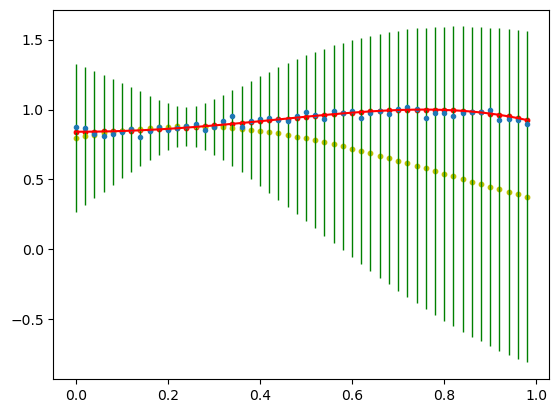

[12, 0]


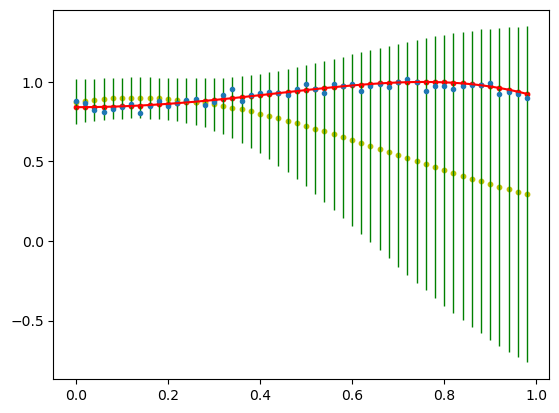

[12, 0, 3]


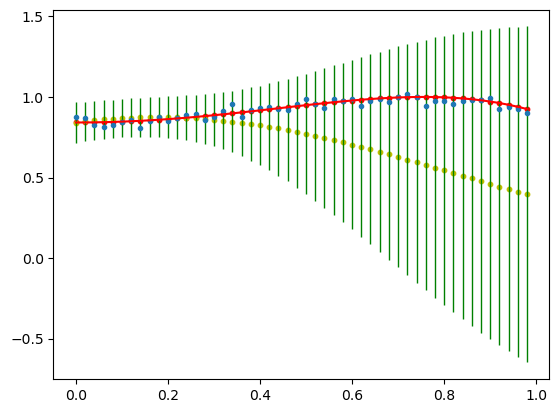

[12, 0, 3, 26]


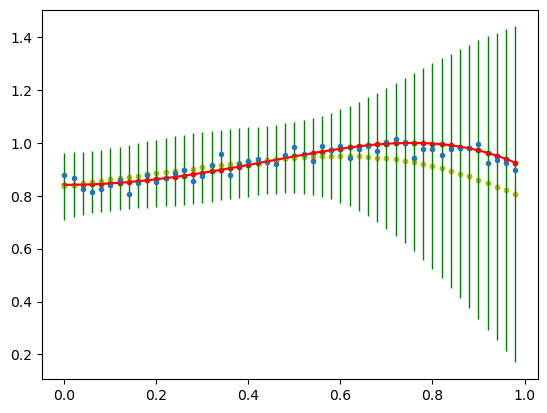

[12, 0, 3, 26, 27]


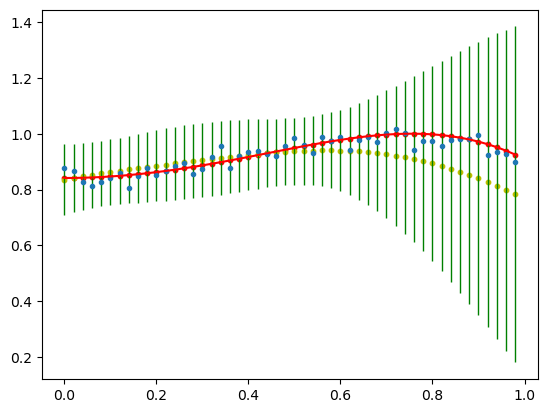

[12, 0, 3, 26, 27, 24]


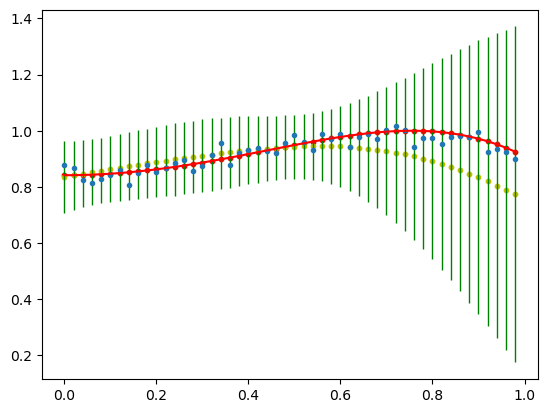

[12, 0, 3, 26, 27, 24, 44]


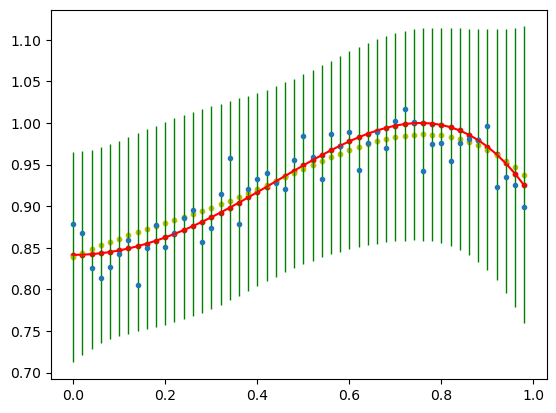

[12, 0, 3, 26, 27, 24, 44, 32]


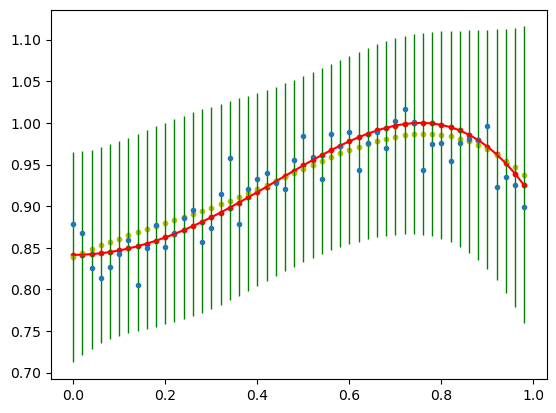

[12, 0, 3, 26, 27, 24, 44, 32, 31]


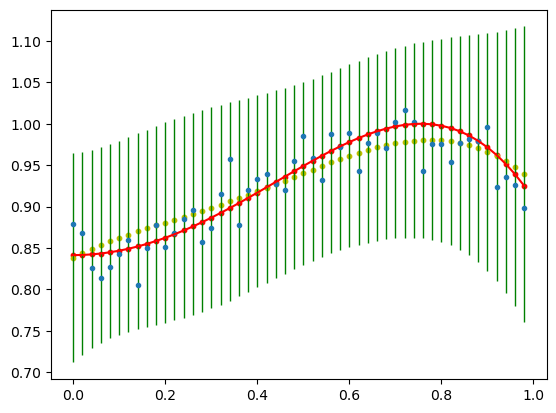

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41]


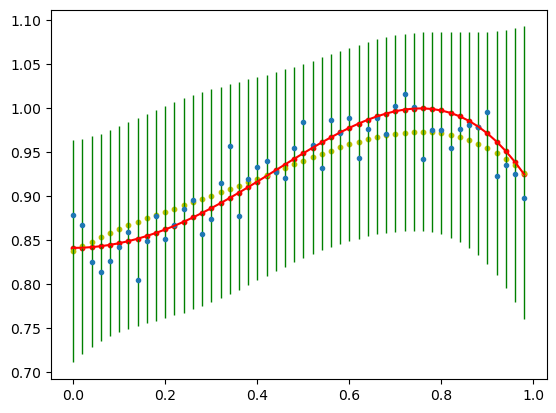

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6]


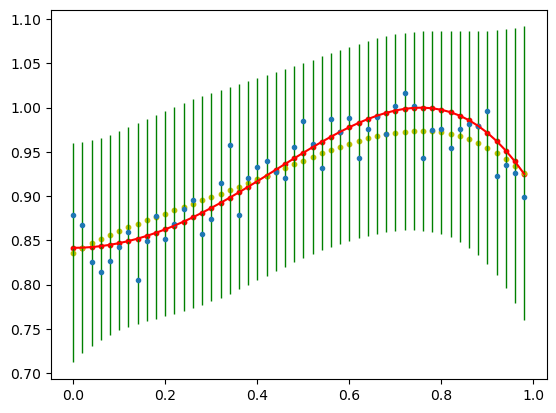

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19]


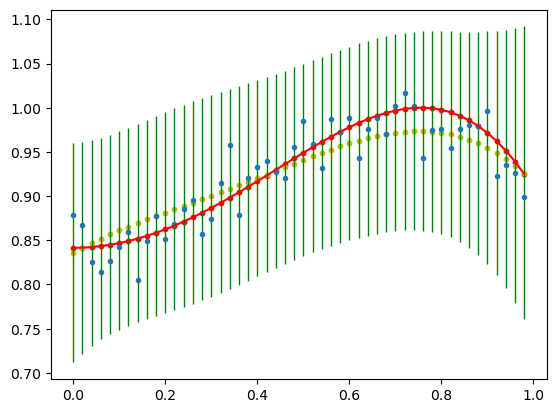

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16]


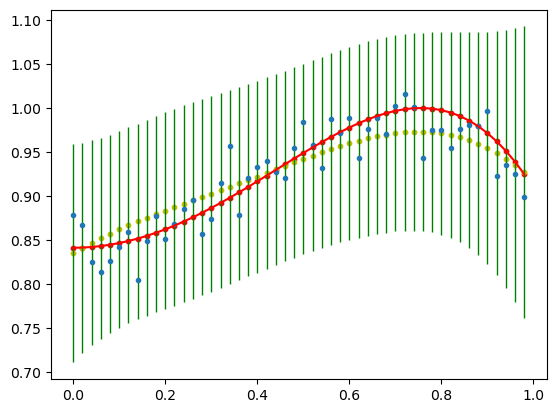

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7]


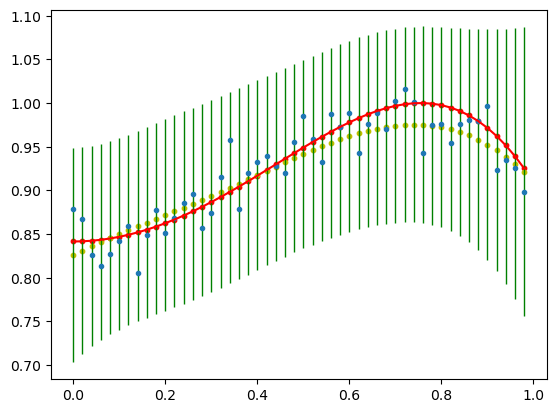

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5]


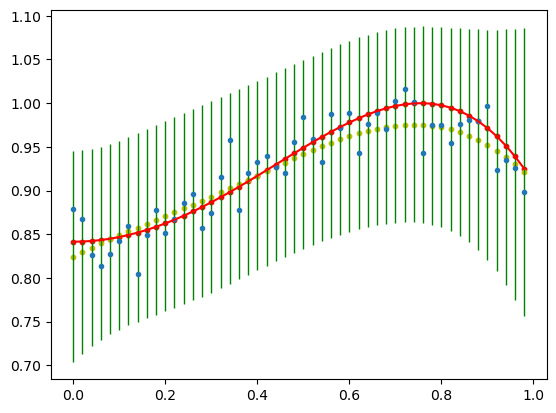

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40]


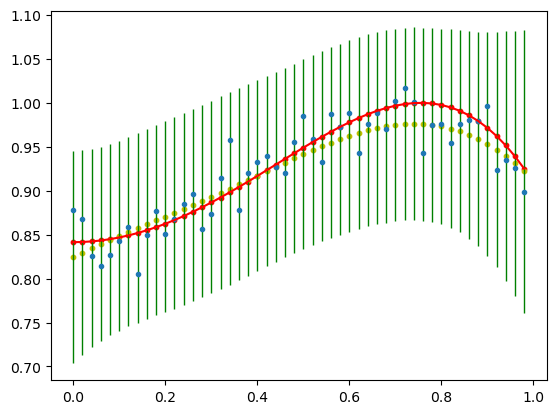

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21]


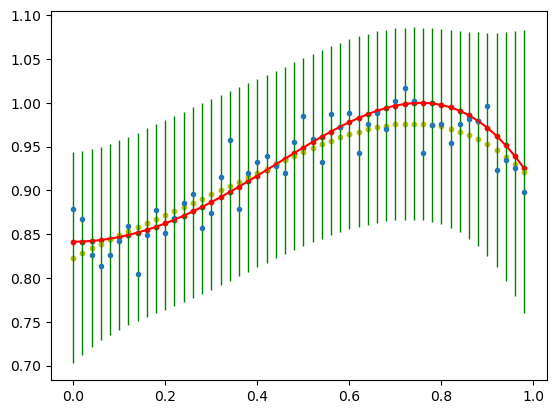

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35]


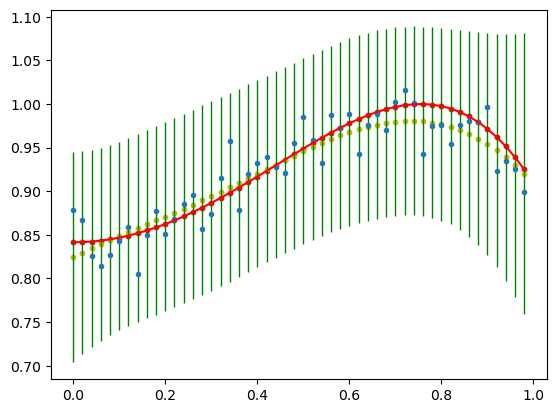

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22]


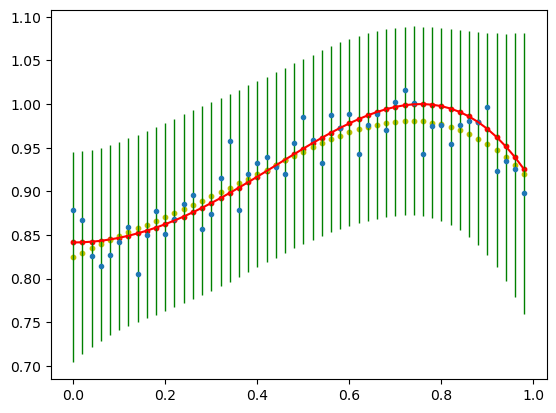

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1]


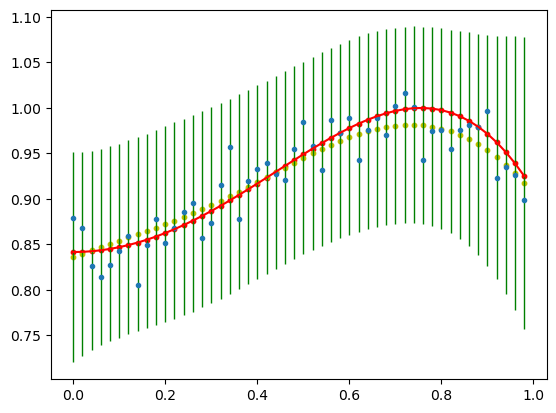

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28]


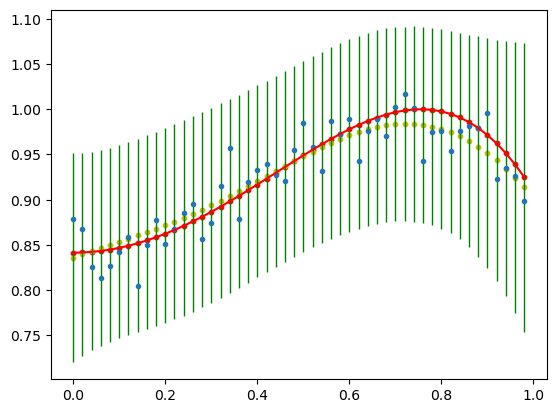

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18]


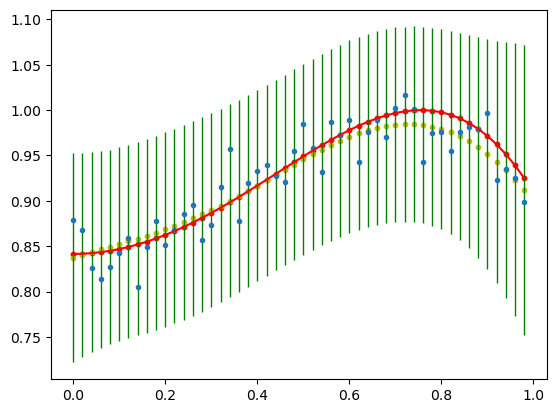

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34]


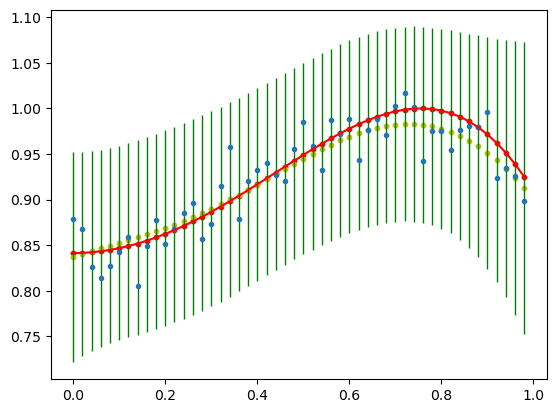

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14]


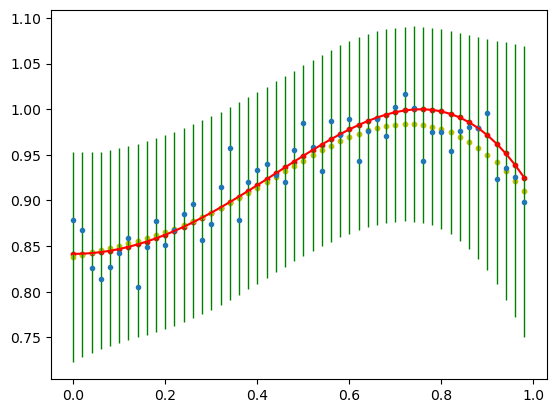

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22]


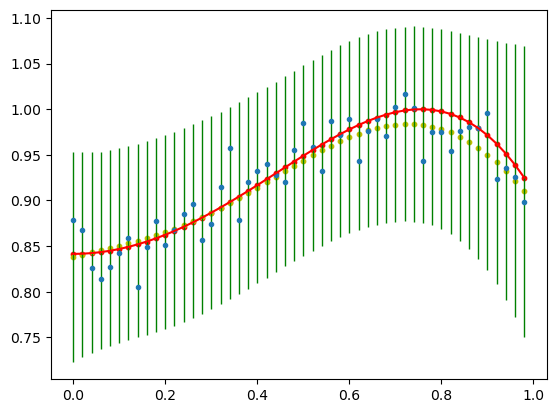

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0]


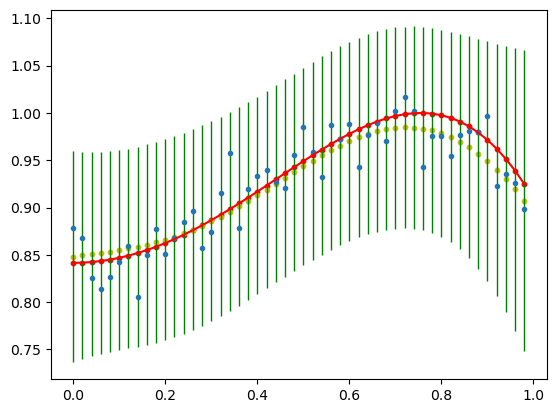

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31]


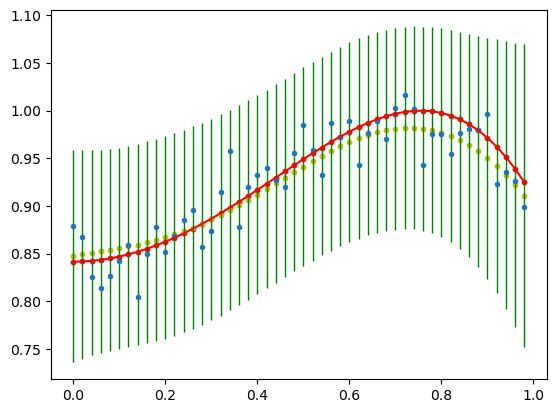

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45]


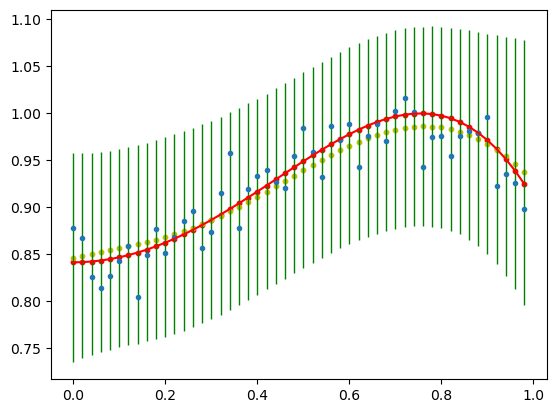

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7]


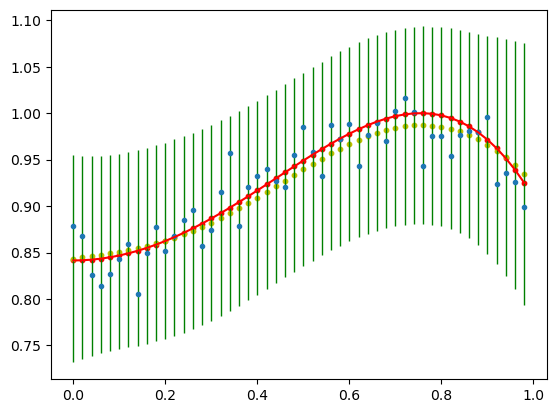

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12]


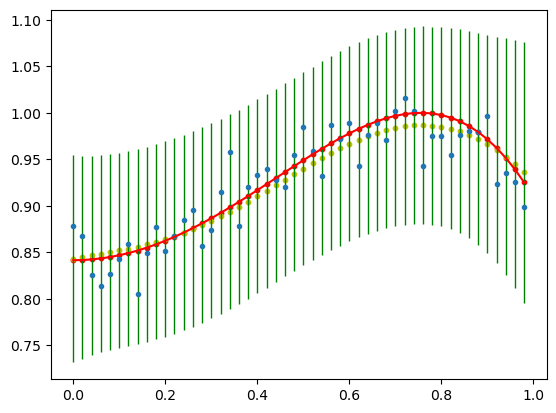

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39]


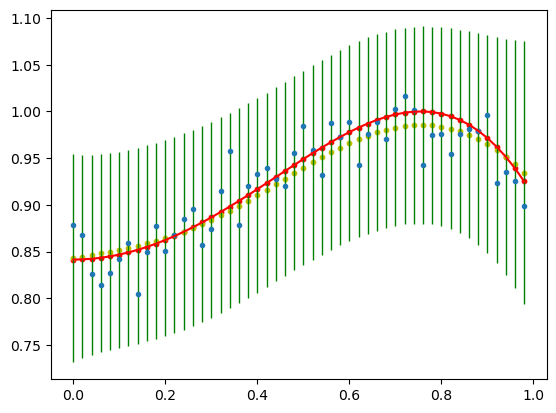

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32]


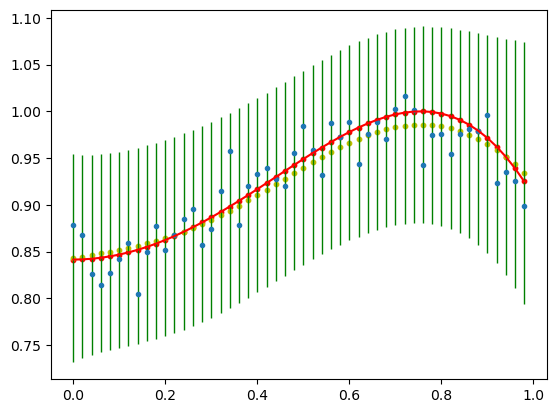

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30]


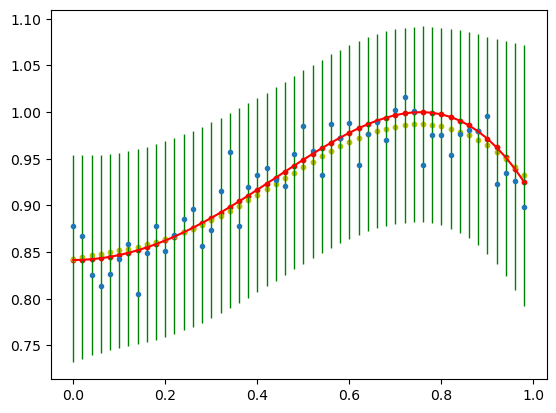

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8]


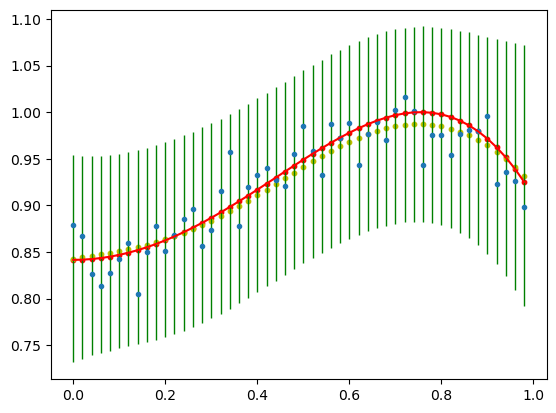

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23]


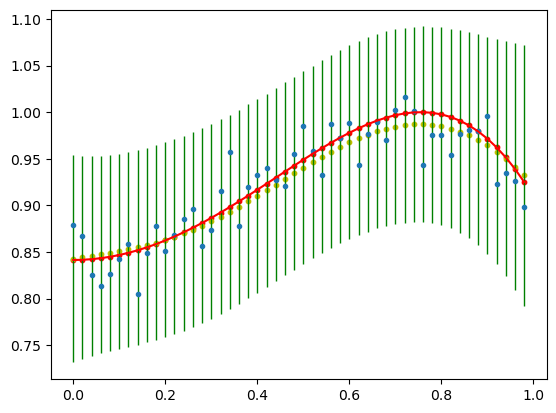

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2]


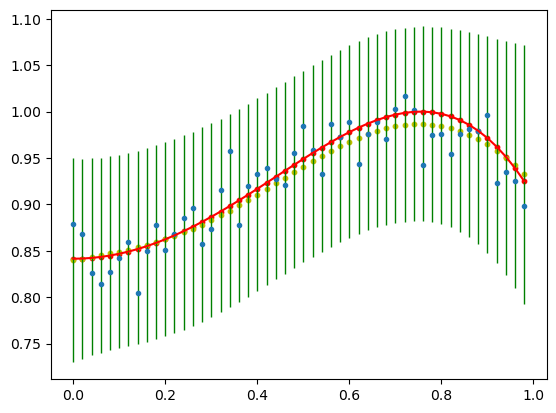

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45]


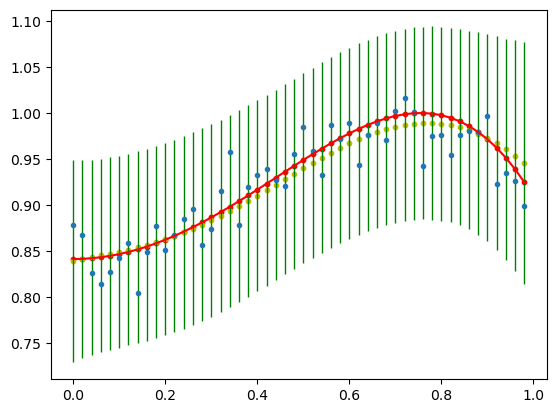

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44]


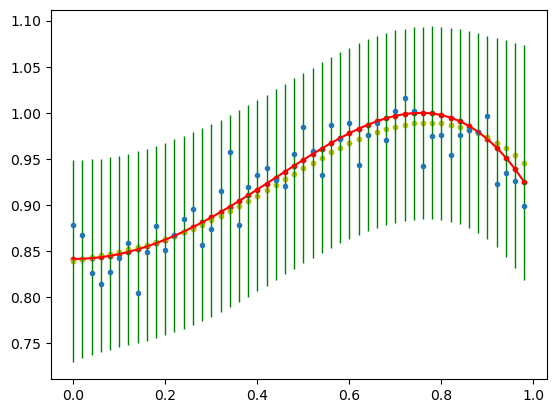

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16]


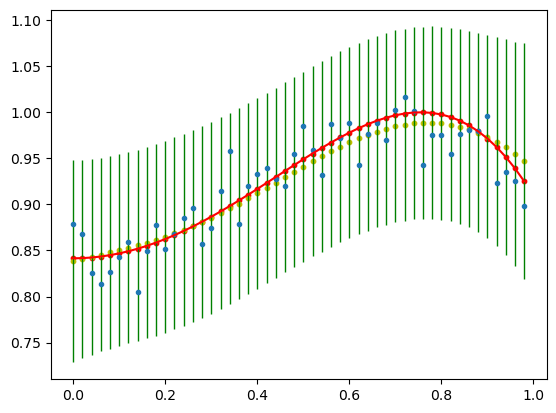

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44]


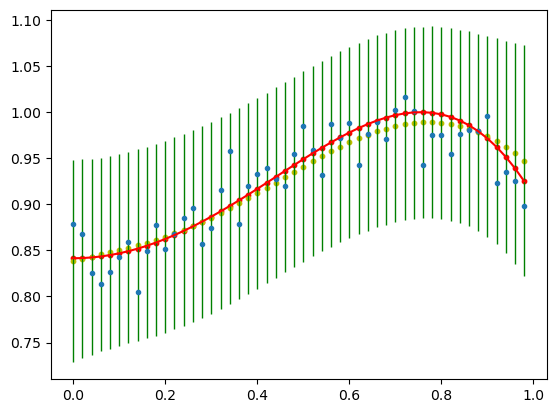

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1]


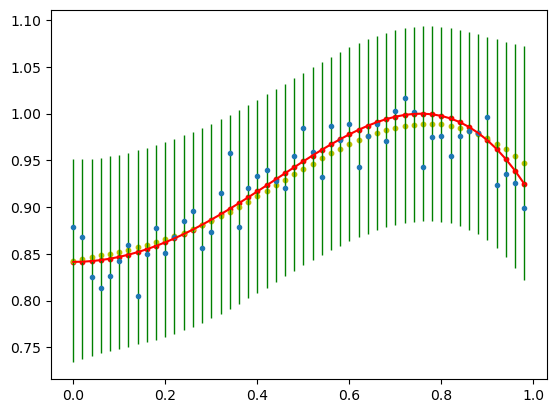

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12]


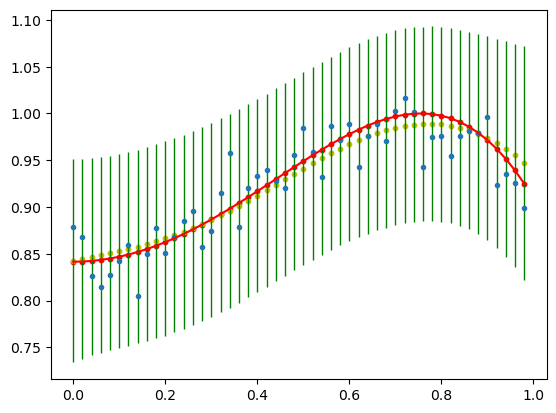

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40]


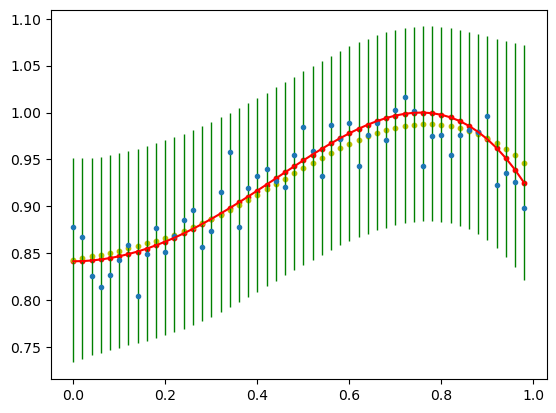

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39]


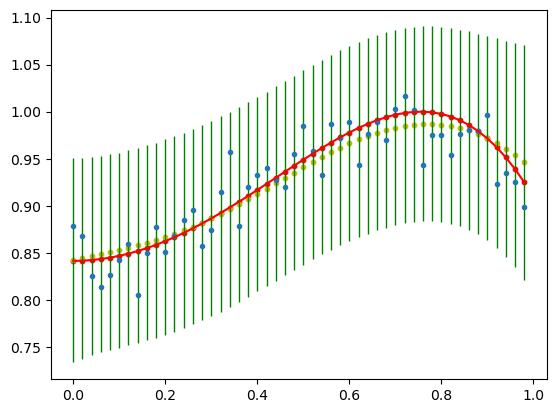

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39, 15]


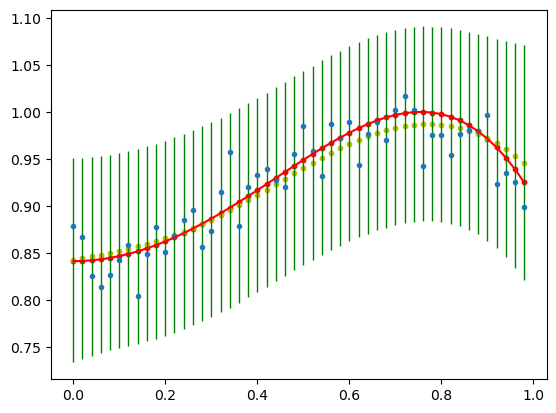

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39, 15, 0]


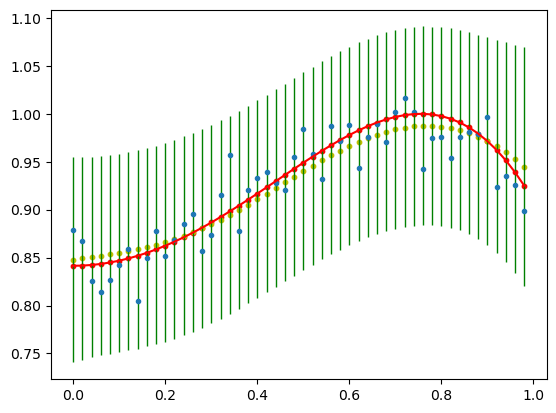

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39, 15, 0, 33]


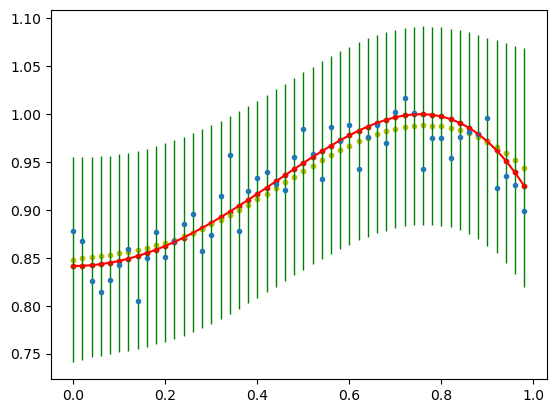

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39, 15, 0, 33, 45]


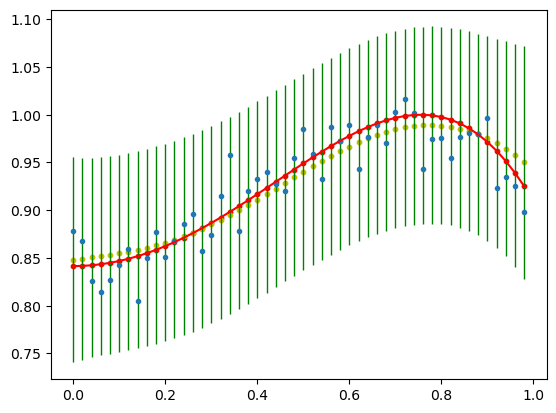

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39, 15, 0, 33, 45, 35]


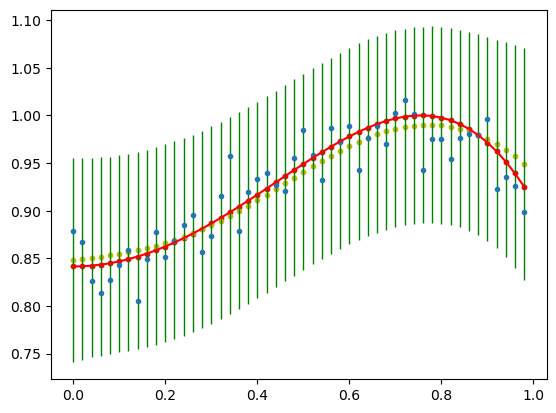

[12, 0, 3, 26, 27, 24, 44, 32, 31, 41, 6, 19, 16, 7, 5, 40, 21, 35, 22, 1, 28, 18, 34, 14, 22, 0, 31, 45, 7, 12, 39, 32, 30, 8, 23, 2, 45, 44, 16, 44, 1, 12, 40, 39, 15, 0, 33, 45, 35, 7]


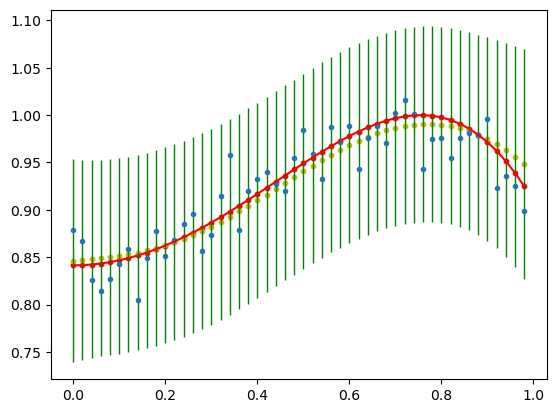

In [1]:
#######6.7.

import matplotlib.pyplot as plt
import numpy as np
import random
import math


def add_noise(y_curve):
    mu = 0
    sigma = 0.03
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise


def actual_distribution():
    x = np.arange(0,1,0.02)
    y = np.sin(x**2 + 1 )
    return x,y


x, y = actual_distribution()
noisy_y = add_noise(y)
z = x
w = noisy_y


# gaussian basis function
def gaussion(a, b, c):
    function_g = math.exp((-np.power((a-b), 2))/(2*np.power(c, 2)))
    return function_g


# caculate faifai 50*m
def basis_gaussion(m, z, miu, s, num): # num*m
    faifai = np.random.randn(num, m)
    for i in range(num):
        for j in range(m):
            faifai[i, j] = gaussion(z[i], miu[j], s)
    return faifai


# fai_n
def fai_nn(n, m, z, miu, s):
    fai_n = np.random.randn(m, 1)
    for i in range(m):
        fai_n[i, 0] = gaussion(z[n], miu[i], s)
    return fai_n


# for MAP posterior
# alpla/beta manual setting 1*m
def posterior_basgau(alpha, beta, faifai, w, num):
    a = np.linalg.inv(beta * np.dot(faifai.T, faifai) + alpha * np.eye(faifai.shape[1], faifai.shape[1]))
    b = np.dot(beta * a, faifai.T)
    c = np.array(w)
    omega_posterior = np.dot(b, c.reshape(num, 1))
    return omega_posterior


def xnn(n, m, z):  # m*1
    xn = np.random.randn(m, 1)
    for i in range(m):
        xn[i, 0] = np.power(z[n], i)
    return xn


m = 200
miu = np.arange(-0.5, 1.5, 2/200) 

s = 0.4
alpha = 40
beta = 100
############
ssn_inverse = alpha * np.eye(m, m)
mn = np.zeros((m, 1))
index_list = []
faifai_pred = basis_gaussion(m, z, miu, s, 50)
for i in range(1, 51):
    idx = random.randint(0, 49)
    inputx = z[idx]
    inputy = w[idx]
    index_list.append(idx)

    ssn_inverse_new = ssn_inverse + beta * np.dot(faifai_pred[idx, :].reshape(1, m).T, faifai_pred[idx, :].reshape(1, m))
    ssn_new = np.linalg.inv(ssn_inverse_new)
    cc = beta * np.dot(faifai_pred[idx, :].reshape(1, m).T, w[idx])
    aa = np.dot(ssn_inverse, mn) + cc.reshape(m, 1)
    mn_new = np.dot(ssn_new, aa)
    ssn_inverse = ssn_inverse_new
    mn = mn_new
    ssn = np.linalg.inv(ssn_inverse)
    # print(mn)
    plt.plot(z, w, linestyle='', marker='.')
    plt.scatter(x, y, c='r', s=10)
    plt.plot(x, y, 'r')
    for v in range(50):
        mstar = np.dot(faifai_pred[v].reshape(1, m), mn)
        ssstar = 1/beta + np.dot(faifai_pred[v].reshape(1, m), np.dot(ssn, faifai_pred[v].reshape(1, m).T))[0][0]
        plt.scatter(x[v], mstar, s=10, c='y')
        plt.errorbar(x[v], mstar, yerr=np.power(ssstar, 0.5), c='g', elinewidth=1)

    print(index_list)
    plt.show()




#####8.
Usually in practice, we don't want to only find the value of the model parameter W, we need to predict the new value of T based on the new value of X, so it is better to find the prediction distribution other tan original bayesian inference.

#####9.
P(t_new|t) means you can predict the future T value from the existing T value, which is much more useful.
P(w|t)means means to build a fitting model based on the existing T values and estimate the values of the parameters W.


* * *

### Part 4: CLASSIFICATION USING FULL BAYESIAN + PREDICTIVE DISTRIBUTION

1.  This is an example code to generate classification data of two classes  
    ![](fig/ass6_code.png)
2.  Based on the code above, generate data similar to:  
    ![](fig/ass7_05.png)
3.  Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2. Based in the generated data and your implementation, compute the probability map:  
    ![](fig/ass7_06.png)
4.  Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.

* * *

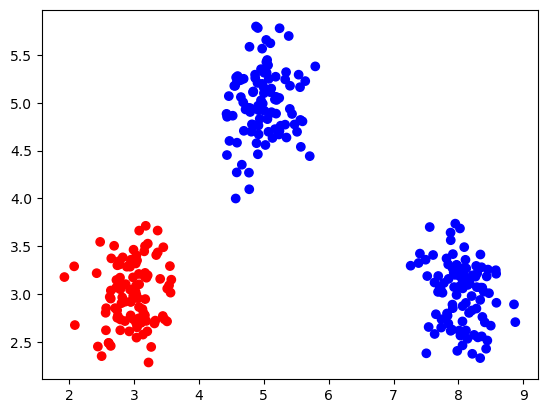

In [8]:
#######1. 2.

import matplotlib.pyplot as plt
import numpy as np
import math
import random


N1 = 100
N2 = 100
N3 = 100
K = 3
sigma = 0.1


mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
x1 = np.random.multivariate_normal(mean, cov, N1) # 生成100个满足分布的数据
c1 = ['red'] * len(x1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
x2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(x2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
x3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(x3)

X = np.concatenate((x1, x2, x3))
color = np.concatenate((c1, c2, c3))
T = 0 * np.ones([len(X), K]) #200*2


for n in range(0, len(X)):
    if(n < len(x1)):
        T[n][0] = 1
    if(n >= N1 and n < len(x1) + len(x2)):
        T[n][1] = 1
    if(n >= N2 and n < len(x1) + len(x2) + len(x3)):
        T[n][2] = 1
T = T.astype(int)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()
##############



  



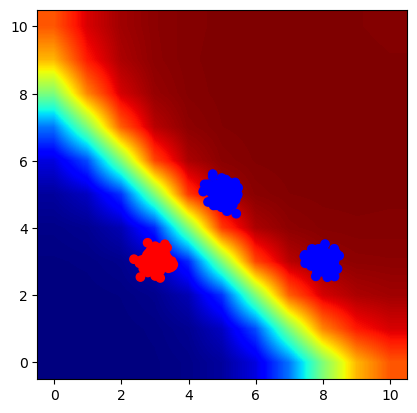

In [1]:
######3.

import matplotlib.pyplot as plt
import numpy as np
N1 = 100
N2 = 100
N3 = 100
K = 2
sigma = 0.05


mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
x1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(x1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
x2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(x2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
x3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(x3)

X = np.concatenate((x1, x2, x3))
color = np.concatenate((c1, c2, c3))
T = 0 * np.ones([len(X), K]) #200*2


for n in range(0, len(X)):
    if(n<len(x1)):
        T[n][0] = 1
    else:
        T[n][1] = 1
T = T.astype(int)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)

m = 10
miu = np.arange(10)
alpha = 10
s = 5
n = 100
n1 = 0

omega = np.zeros((m, 1))
while n1 < n:
    faitry = np.zeros((300, m))
    for u in range(300):
        for v in range(m):
            faitry[u][v] = np.exp((-(X[u][0] - miu[v])**2 - (X[u][1] - miu[v])**2)/(2 * (s**2)))
    faisee = faitry.T     # n * m
    an = np.dot(omega.T, faisee)  # 1*n
    y = 1/(1 + np.exp(-1 * an)) # 1*n
    rnn = np.zeros((300, 300))
    for o in range(300):
        for q in range(300):
            if o == q:
                rnn[o][q] = y[0, o] * (1 - y[0, o])         # n*m

    ssninverse = np.linalg.inv(alpha * np.eye(m, m)) + np.dot(np.dot(faisee, rnn), faisee.T)
    ssn = np.linalg.inv(ssninverse) # m*m
    ww = np.array(T[:, 1]).reshape(300, 1)
    xx = y.T -ww # n*1
    ew_one = np.dot(np.linalg.inv(alpha * np.eye(m, m)), omega) + np.dot(faisee, xx)
    aaa = np.dot(ssn, ew_one)
    omega = omega - aaa # m*1
    n1 += 1

xaxis = np.arange(0, 11)
yaxis = np.arange(0, 11)
p = np.zeros((11, 11))
fai = np.zeros((1, m))

for i in xaxis:
    for j in yaxis:
        for k in range(m):
            fai[0, k] = np.exp((-(i - miu[k])**2 - (j - miu[k])**2)/(2 * (s**2)))
        a = np.dot(fai, omega)
        sigma = fai.dot(np.linalg.inv(ssninverse)).dot(np.transpose(fai))
        p[i, j] = 1 - 1 / (1 + np.exp(a / (1 + np.sqrt((np.pi / 8) * sigma))))
plt.imshow(p, interpolation='bilinear', origin='lower', cmap=plt.cm.jet)
plt.show()





In [46]:
#######4.

import matplotlib.pyplot as plt
import numpy as np

N1 = 100
N2 = 100
N3 = 100
K = 2
sigma = 0.05
mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
x1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(x1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
x2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(x2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
x3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(x3)

X = np.concatenate((x1, x2, x3))
color = np.concatenate((c1, c2, c3))
T = 0 * np.ones([len(X), K]) #200*2


for n in range(0, len(X)):
    if(n<len(x1)):
        T[n][0] = 1
    else:
        T[n][1] = 1
T = T.astype(int)
m = 10
miu = np.arange(10)
alpha = 10
s = 5
n = 100
n1 = 0

omega = np.zeros((m, 1))
while n1 < n:
    faitry = np.zeros((300, m))
    for u in range(300):
        for v in range(m):
            faitry[u][v] = np.exp((-(X[u][0] - miu[v])**2 - (X[u][1] - miu[v])**2)/(2 * (s**2)))
    faisee = faitry.T     # n * m
    an = np.dot(omega.T, faisee)  # 1*n
    y = 1/(1 + np.exp(-1 * an)) # 1*n
    rnn = np.zeros((300, 300))
    for o in range(300):
        for q in range(300):
            if o == q:
                rnn[o][q] = y[0, o] * (1 - y[0, o])         # n*m

    ssninverse = np.linalg.inv(alpha * np.eye(m, m)) + np.dot(np.dot(faisee, rnn), faisee.T)
    ssn = np.linalg.inv(ssninverse) # m*m
    ww = np.array(T[:, 1]).reshape(300, 1)
    xx = y.T -ww # n*1
    ew_one = np.dot(np.linalg.inv(alpha * np.eye(m, m)), omega) + np.dot(faisee, xx)
    aaa = np.dot(ssn, ew_one)
    omega = omega - aaa # m*1
    n1 += 1

########
print('input x')
x_give = int(input())
print('input y')
y_give = int(input())


##########
fai = np.zeros((1, m))


for k in range(m):
    fai[0, k] = np.exp((-(x_give - miu[k])**2 - (y_give - miu[k])**2)/(2 * (s**2)))
a = np.dot(fai, omega)
sigma = fai.dot(np.linalg.inv(ssninverse)).dot(np.transpose(fai))
p = 1 - 1 / (1 + np.exp(a / (1 + np.sqrt((np.pi / 8) * sigma))))
if p > 0.5:
    aaa = 'C2'
    uncertainty = 1-p
else:
    y = 'C1'
    uncertainty = p
print('Predict is',aaa)
print('uncertainty:', uncertainty)

input x
3
input y
5
Predict is C2
uncertainty: [[0.48937201]]
